<a href="https://colab.research.google.com/github/shishirsingh645/MACHINE-LEARNING/blob/main/MULTIPLE%20CLASS%20AQI%20CLASSIFICATION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ncr_aqi_data = pd.read_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/NCR_AQI.csv')

ncr_aqi_data.head().style.background_gradient(cmap='coolwarm')


In [ ]:
ncr_aqi_data.describe().style.background_gradient(cmap='coolwarm')

CLEANUP OF DATASET

In [ ]:
######################################ADD THIS ########################

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd


missing_values_summary = ncr_aqi_data.isnull().sum()


numerical_columns = ncr_aqi_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ncr_aqi_data.select_dtypes(include=['object']).columns


num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
ncr_aqi_data[numerical_columns] = num_imputer.fit_transform(ncr_aqi_data[numerical_columns])
ncr_aqi_data[categorical_columns] = cat_imputer.fit_transform(ncr_aqi_data[categorical_columns])


ncr_aqi_data = ncr_aqi_data.drop_duplicates()

# Manual Encoding

aqi_bucket_mapping = {
    "Moderate": 0,
    "Poor": 1,
    "Satisfactory": 2,
    "Severe": 3,
    "Very Poor": 4
}


ncr_aqi_data['AQI_Bucket_Encoded'] = ncr_aqi_data['AQI_Bucket'].map(aqi_bucket_mapping)


scaler = StandardScaler()
ncr_aqi_data[numerical_columns] = scaler.fit_transform(ncr_aqi_data[numerical_columns])

prepared_data_summary = {
    "Missing Values After Imputation": ncr_aqi_data.isnull().sum(),
    "Data Shape After Duplicates Removal": ncr_aqi_data.shape,
    "Unique AQI_Bucket Encodings": aqi_bucket_mapping,
}


print("Cleaned NCR AQI Data:")
print(ncr_aqi_data.head())


print("\nSummary of Prepared Data:")
for key, value in prepared_data_summary.items():
    print(f"{key}: {value}")


ncr_aqi_data.to_csv("Cleaned_NCR_AQI_Data.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_NCR_AQI_Data.csv'.")


Cleaned NCR AQI Data:
    City   midlong    midlat     PM2.5      PM10        NO       NO2  \
0  Delhi  0.581542 -2.363102  2.744533  3.338700  1.088450 -0.783486   
1  Delhi  0.742630 -2.363102  0.881603  0.262821  0.850856 -0.942132   
2  Delhi  0.259367 -2.228866 -0.570146 -0.988235 -0.371057 -1.057511   
3  Delhi  0.420455 -2.228866  0.378037  0.010973 -0.395253 -0.760050   
4  Delhi  0.581542 -2.228866  0.301197 -0.195430 -0.764919 -0.849739   

        NOx       NH3        CO       SO2        O3   Benzene   Toluene  \
0  0.603698 -0.489658  2.571249 -0.726135 -0.758292  4.002403  1.790806   
1  0.081905 -0.569912  1.234444 -1.033538 -1.115864  2.510830  1.151113   
2 -0.852209  0.928682  1.487161 -1.506465 -1.429160 -0.088658 -0.171186   
3 -0.836637  3.344629  1.706813 -1.272366 -1.256634  0.048363 -0.240922   
4 -1.077661  3.047452  1.154141 -1.426067 -1.322591 -0.523211 -0.710298   

     Xylene       AQI AQI_Bucket  AQI_Bucket_Encoded  
0  2.659412  1.980790     Severe       

In [ ]:
aqi_bucket_mapping = {
    "Moderate": 0,
    "Poor": 1,
    "Satisfactory": 2,
    "Severe": 3,
    "Very Poor": 4
}
ncr_aqi_data['AQI_Bucket_Encoded'] = ncr_aqi_data['AQI_Bucket'].map(aqi_bucket_mapping)
print(ncr_aqi_data.head())
# Optional: Save the cleaned dataset
ncr_aqi_data.to_csv("Cleaned_NCR_AQI_Data.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_NCR_AQI_Data.csv'.")

    City   midlong    midlat     PM2.5      PM10        NO       NO2  \
0  Delhi  0.581542 -2.363102  2.744533  3.338700  1.088450 -0.783486   
1  Delhi  0.742630 -2.363102  0.881603  0.262821  0.850856 -0.942132   
2  Delhi  0.259367 -2.228866 -0.570146 -0.988235 -0.371057 -1.057511   
3  Delhi  0.420455 -2.228866  0.378037  0.010973 -0.395253 -0.760050   
4  Delhi  0.581542 -2.228866  0.301197 -0.195430 -0.764919 -0.849739   

        NOx       NH3        CO       SO2        O3   Benzene   Toluene  \
0  0.603698 -0.489658  2.571249 -0.726135 -0.758292  4.002403  1.790806   
1  0.081905 -0.569912  1.234444 -1.033538 -1.115864  2.510830  1.151113   
2 -0.852209  0.928682  1.487161 -1.506465 -1.429160 -0.088658 -0.171186   
3 -0.836637  3.344629  1.706813 -1.272366 -1.256634  0.048363 -0.240922   
4 -1.077661  3.047452  1.154141 -1.426067 -1.322591 -0.523211 -0.710298   

     Xylene       AQI AQI_Bucket  AQI_Bucket_Encoded  
0  2.659412  1.980790     Severe                   3  
1  0.2

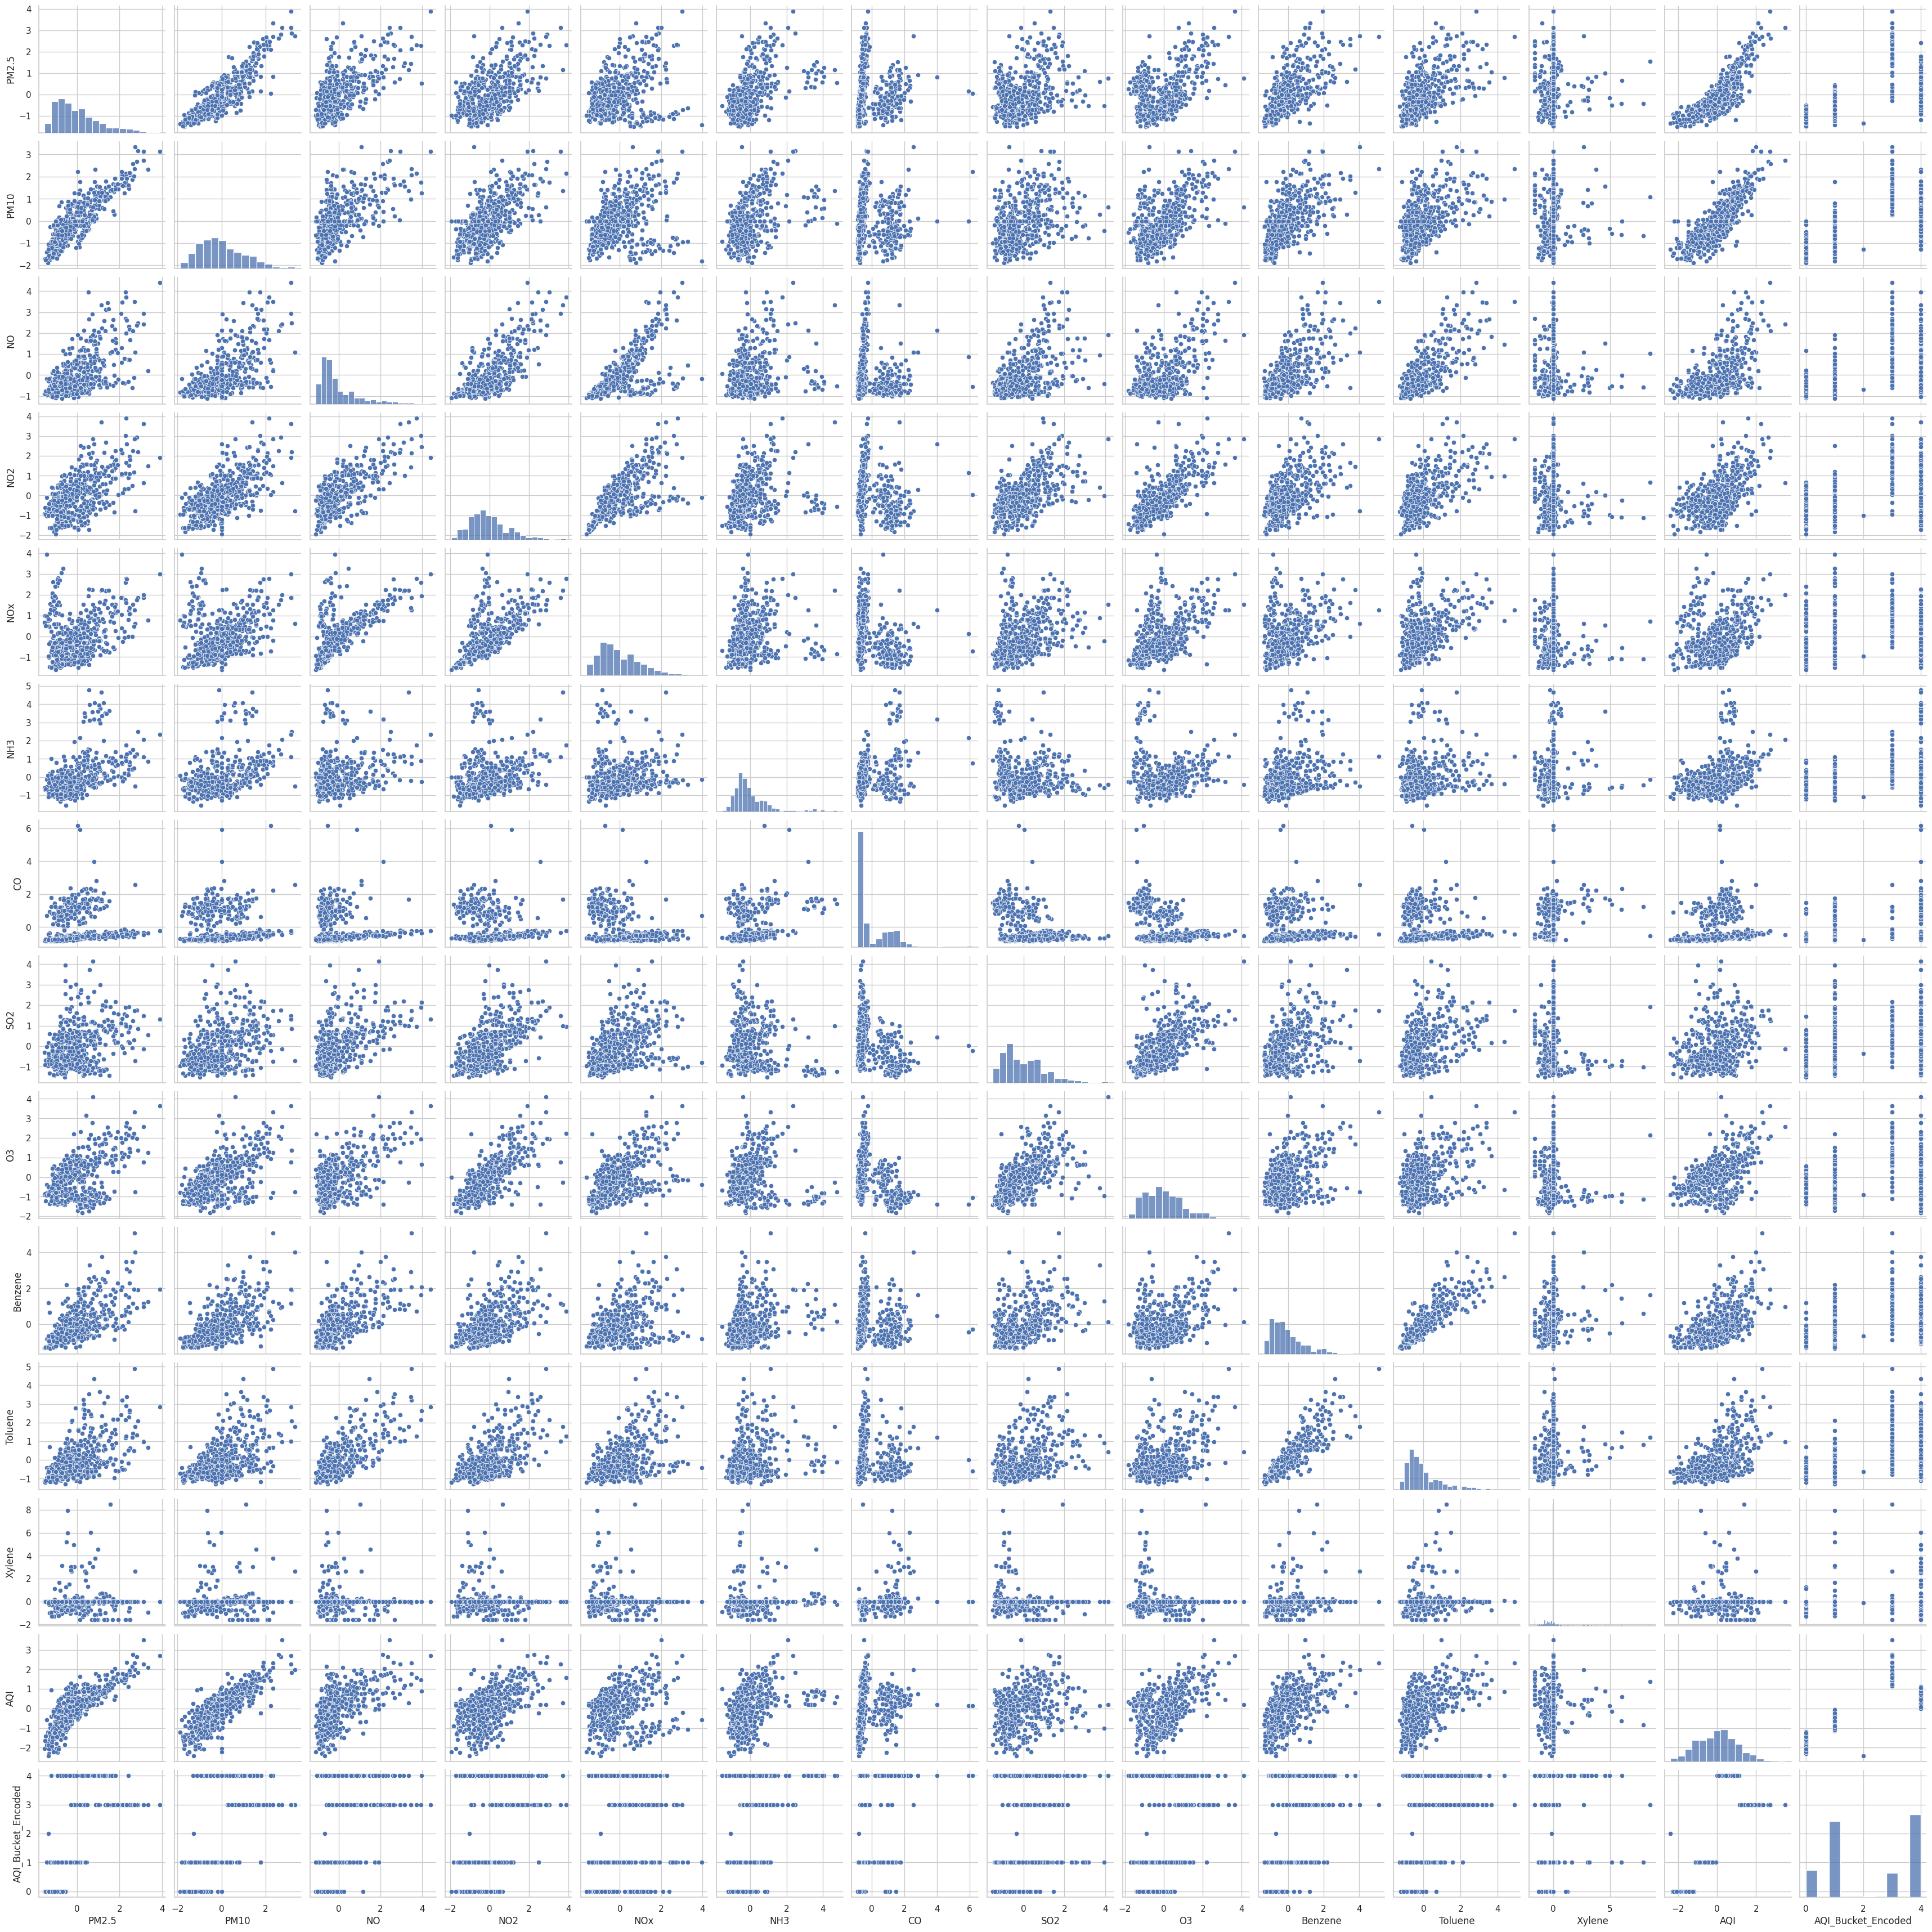

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exclude_columns = ['midlong', 'midlat']

columns_to_plot = [col for col in ncr_aqi_data.columns if col not in exclude_columns]

sns.pairplot(ncr_aqi_data[columns_to_plot])
plt.show()

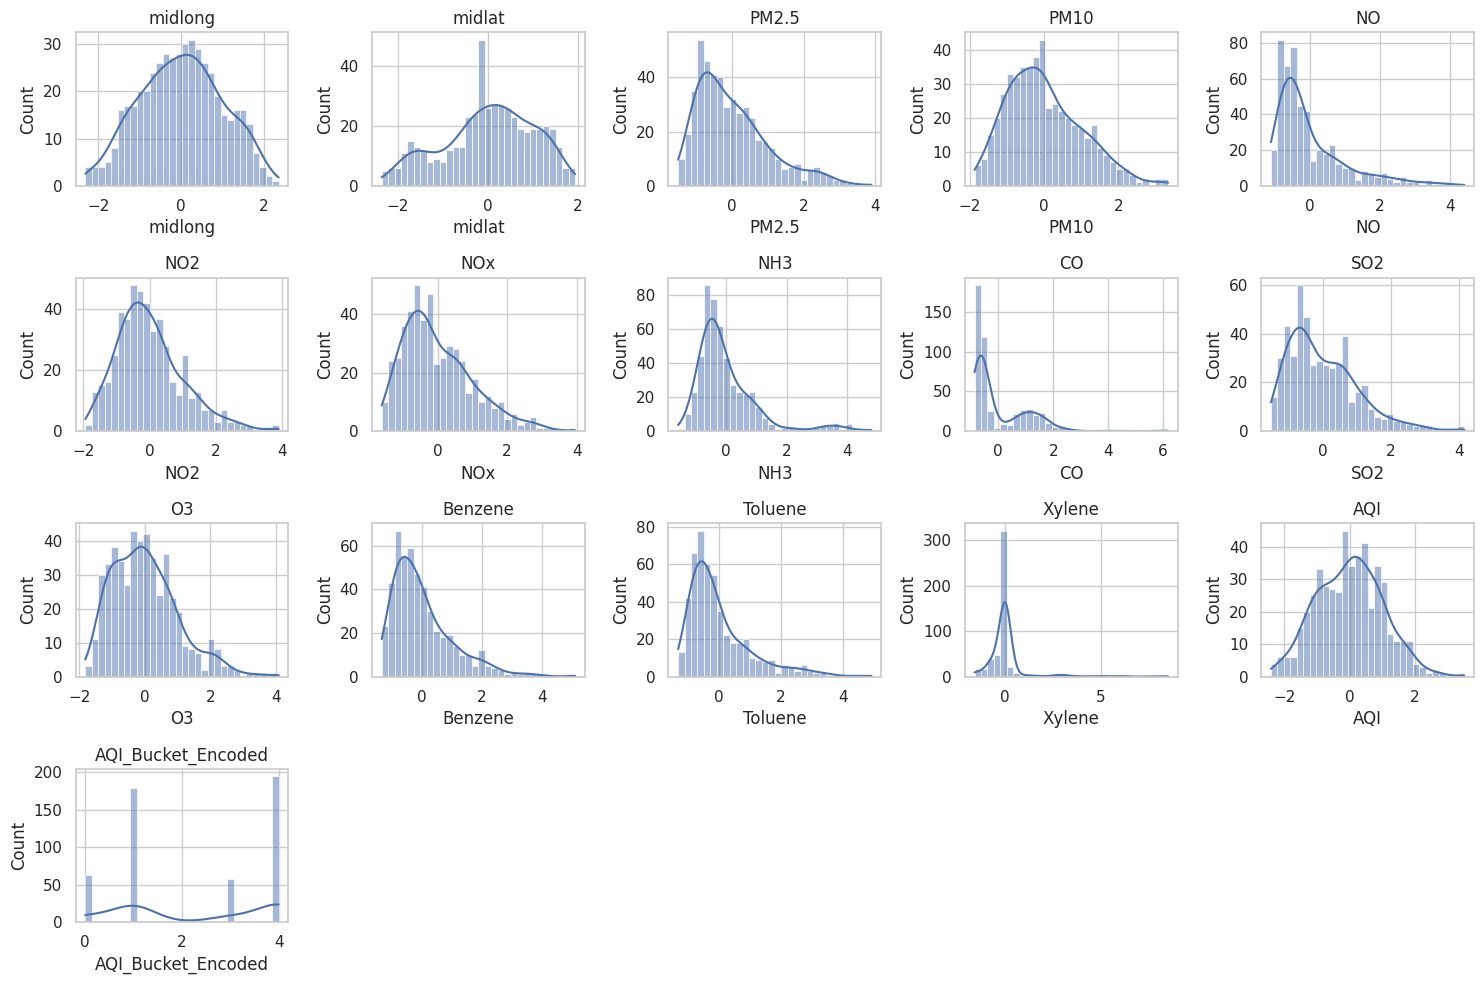

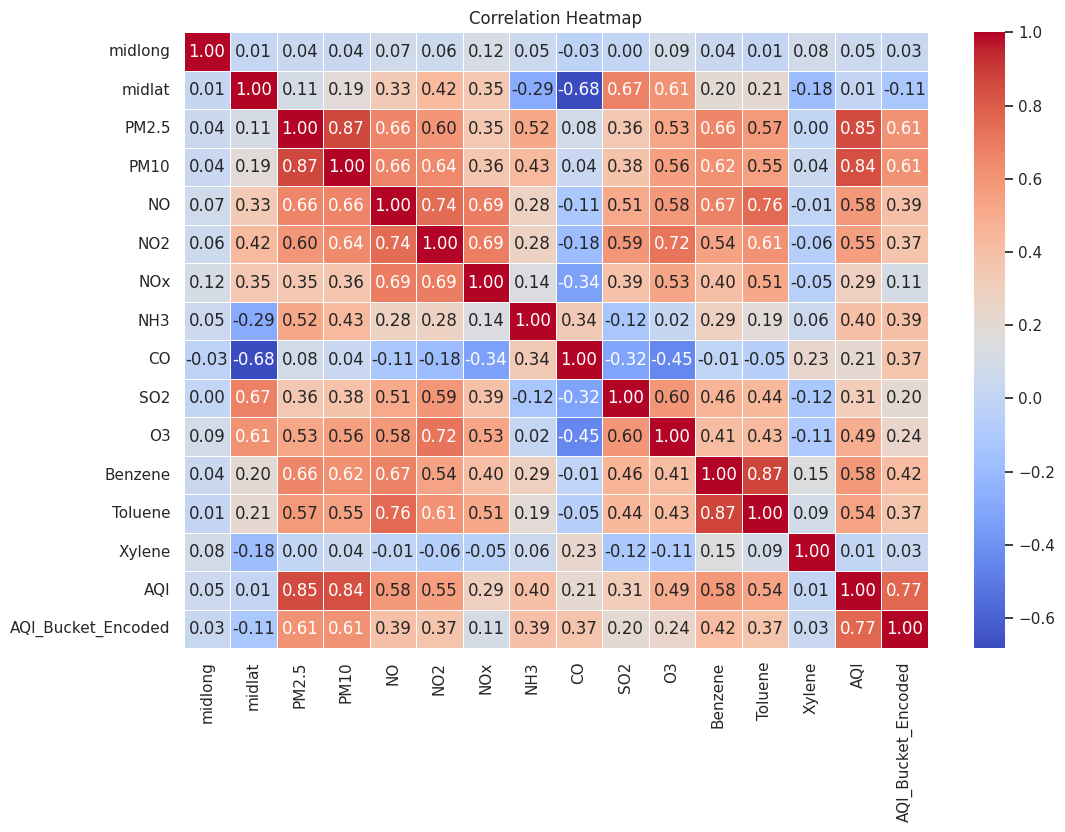

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(15, 10))

numerical_features = ncr_aqi_data.select_dtypes(include=['number']).columns
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(ncr_aqi_data[column], kde=True, bins=30)
    plt.title(column)
    plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

correlation_matrix = ncr_aqi_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

# Drop 'midlat' and 'midlong' columns
#ncr_aqi_data = ncr_aqi_data.drop(columns=['midlat', 'midlong'])


numerical_columns = ncr_aqi_data.select_dtypes(include=['number']).columns
aqi_category_trends = ncr_aqi_data.groupby('AQI_Bucket')[numerical_columns].mean()


plt.figure(figsize=(14, 8))
ax = sns.barplot(data=aqi_category_trends.reset_index().melt(id_vars=['AQI_Bucket']),
                 x='variable', y='value', hue='AQI_Bucket')
plt.title("Average Values of Pollutants Across AQI Categories")
plt.xlabel("Features")
plt.ylabel("Average Scaled Value")
plt.xticks(rotation=45, ha='right')
plt.legend(title="AQI Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ncr_aqi_data, x='AQI_Bucket', order=label_encoder.classes_)
plt.title("Frequency of AQI Categories")
plt.xlabel("AQI Categories")
plt.ylabel("Count")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

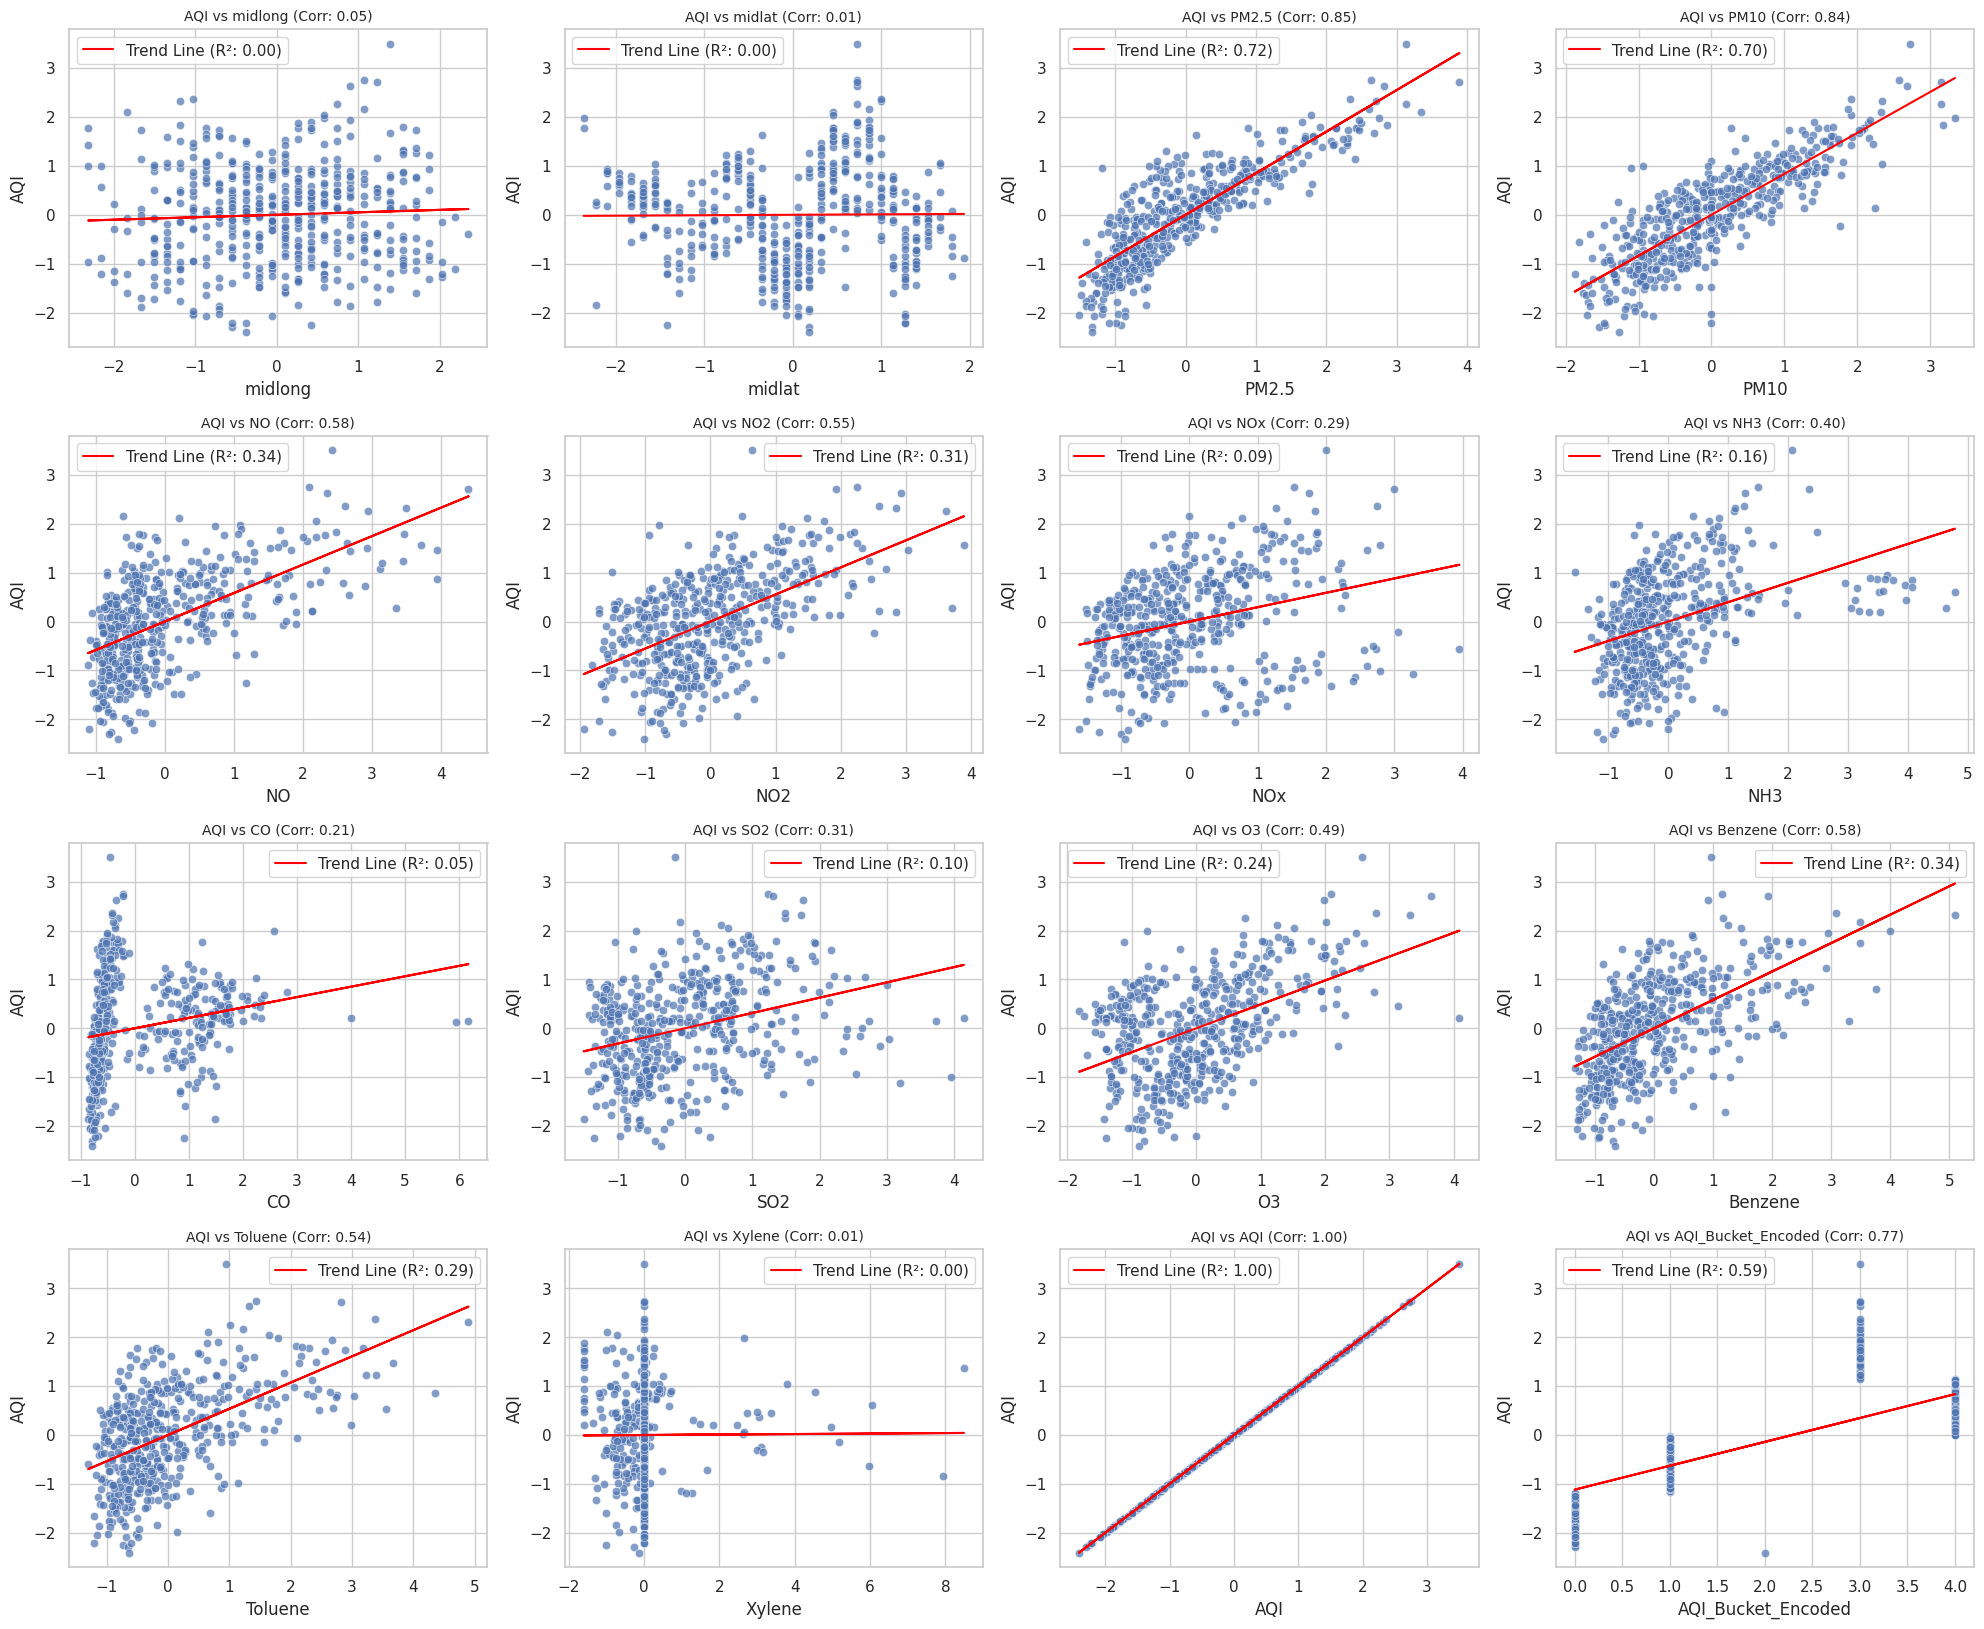

In [ ]:
############## add this#########

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#ncr_aqi_data = ncr_aqi_data.drop(columns=['AQI_Bucket','City'])

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)


    sns.scatterplot(data=ncr_aqi_data, x=feature, y='AQI', alpha=0.7)


    x = ncr_aqi_data[[feature]].values
    y = ncr_aqi_data['AQI'].values
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)


    r2 = r2_score(y, y_pred)

    correlation = np.corrcoef(ncr_aqi_data[feature], ncr_aqi_data['AQI'])[0, 1]

    plt.plot(ncr_aqi_data[feature], y_pred, color='red', label=f"Trend Line (R²: {r2:.2f})")

    plt.title(f"AQI vs {feature} (Corr: {correlation:.2f})", fontsize=10)
    plt.xlabel(feature)
    plt.ylabel("AQI")
    plt.legend()
    plt.tight_layout()

plt.show()


In [ ]:

#ncr_aqi_data = ncr_aqi_data.drop(columns=['City'])
severe_aqi_data = ncr_aqi_data[ncr_aqi_data['AQI_Bucket'] == 'Severe']


severe_aqi_means = severe_aqi_data.mean()


overall_means = ncr_aqi_data.mean()
severe_vs_overall = pd.DataFrame({
    "Severe AQI Means": severe_aqi_means,
    "Overall Means": overall_means
}).dropna()

severe_vs_overall['Difference'] = severe_vs_overall['Severe AQI Means'] - severe_vs_overall['Overall Means']
severe_vs_overall = severe_vs_overall.sort_values(by='Difference', ascending=False)


plt.figure(figsize=(14, 8))
severe_vs_overall[['Severe AQI Means', 'Overall Means']].plot(kind='bar', figsize=(14, 8))
plt.title("Comparison of Severe AQI Means vs Overall Means")
plt.ylabel("Average Scaled Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


tools.display_dataframe_to_user(name="Factors Affecting Severe AQI", dataframe=severe_vs_overall)


FEATURE SELECTION

In [ ]:
###############aadd this############## feature selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_regression
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer



ncr_aqi_data = pd.read_csv('/content/Cleaned_NCR_AQI_Data.csv')
ncr_aqi_data = ncr_aqi_data.drop(columns=['City'])


numerical_columns = ncr_aqi_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ncr_aqi_data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

ncr_aqi_data[numerical_columns] = num_imputer.fit_transform(ncr_aqi_data[numerical_columns])
ncr_aqi_data[categorical_columns] = cat_imputer.fit_transform(ncr_aqi_data[categorical_columns])

X = ncr_aqi_data.drop(columns=['AQI', 'AQI_Bucket', 'AQI_Bucket_Encoded'], errors='ignore')
y = ncr_aqi_data['AQI']


X_numerical = X.select_dtypes(include=np.number)
X_non_negative = X_numerical - np.min(X_numerical, axis=0)

# Discretize the target variable 'y' for Chi-Square
# Create bins for AQI values - you might need to adjust the number of bins (n_bins)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_discretized = discretizer.fit_transform(y.values.reshape(-1, 1))
y_discretized = y_discretized.astype(int)


chi2_scores, _ = chi2(X_non_negative, y_discretized.ravel())


spearman_scores = [spearmanr(X[col], y)[0] for col in X.columns]


mutual_info_scores = mutual_info_regression(X, y, random_state=42)


feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square': chi2_scores,
    'Spearman Correlation': spearman_scores,
    'Mutual Information': mutual_info_scores
})


feature_scores['Average Score'] = feature_scores[['Chi-Square', 'Spearman Correlation', 'Mutual Information']].mean(axis=1)
feature_scores = feature_scores.sort_values(by='Average Score', ascending=False)


output_file_path = "Feature_Selection_Scores.csv"
feature_scores.to_csv(output_file_path, index=False)


print(f"Feature selection scores have been saved to '{output_file_path}'.")


Feature selection scores have been saved to 'Feature_Selection_Scores.csv'.


# MODEL

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

ncr_aqi_data = pd.read_csv('/content/Cleaned_NCR_AQI_Data.csv')

coordinates = ncr_aqi_data[['midlong', 'midlat']].copy()
ncr_aqi_data = ncr_aqi_data.drop(columns=['City'])

X = ncr_aqi_data[[col for col in ncr_aqi_data.columns
                  if col not in ['midlong', 'midlat','AQI', 'AQI_Bucket', 'AQI_Bucket_Encoded']]]
y = ncr_aqi_data['AQI_Bucket_Encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


data_split_summary = {
    "Training Set Size (X_train, y_train)": (X_train.shape, y_train.shape),
    "Testing Set Size (X_test, y_test)": (X_test.shape, y_test.shape)
}


data_split_summary
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd


models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report


results_df = pd.DataFrame({name: pd.Series(report["weighted avg"]) for name, report in results.items()}).T
results_df = results_df[['precision', 'recall', 'f1-score', 'support']].sort_values(by='f1-score', ascending=False)

results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

precision    recall  f1-score  support
Random Forest         0.786094  0.777778  0.775103     99.0
Logistic Regression   0.769096  0.767677  0.766690     99.0
SVM                   0.797666  0.767677  0.762287     99.0
XGBoost               0.731071  0.727273  0.726072     99.0
Decision Tree         0.717050  0.707071  0.711302     99.0
Naive Bayes           0.617645  0.616162  0.612444     99.0

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

ncr_aqi_data = pd.read_csv('/content/Cleaned_NCR_AQI_Data.csv')

coordinates = ncr_aqi_data[['midlong', 'midlat']].copy()


X = ncr_aqi_data[[col for col in ncr_aqi_data.columns
                  if col not in ['midlong', 'midlat','AQI', 'AQI_Bucket', 'AQI_Bucket_Encoded']]]
y = ncr_aqi_data['AQI_Bucket_Encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


data_split_summary = {
    "Training Set Size (X_train, y_train)": (X_train.shape, y_train.shape),
    "Testing Set Size (X_test, y_test)": (X_test.shape, y_test.shape)
}


data_split_summary

{'Training Set Size (X_train, y_train)': ((396, 13), (396,)),
 'Testing Set Size (X_test, y_test)': ((99, 13), (99,))}

In [ ]:
X_train.head()

City     PM2.5      PM10        NO       NO2       NOx       NH3  \
329  Delhi  0.827639  0.698259  1.855338  0.699315  1.383483 -0.218306   
56   Delhi  0.215851 -0.627051 -0.854647 -1.479366 -1.347274 -0.911982   
352  Delhi -0.171721  0.000000  0.370627 -1.213904 -0.654416  1.107067   
222  Delhi -0.718840 -0.935157 -0.164044 -0.195774  3.047875 -0.178180   
439  Delhi -0.656077 -0.711213  1.169441 -0.866866 -0.221409 -0.801534   

           CO       SO2        O3   Benzene   Toluene    Xylene  
329 -0.584178  0.704471  0.830479  0.134490  0.090323 -1.159302  
56   2.195715 -0.994521 -1.154034 -0.910786 -0.609718 -0.027992  
352 -0.560559 -0.262666 -1.021509 -0.605424 -0.212759  0.000000  
222 -0.520408 -1.083195 -0.117348 -0.468403 -0.088040  0.000000  
439 -0.607796  0.587421  0.347099 -0.350956  0.062161  0.000000

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd
ncr_aqi_data = pd.read_csv('/content/Cleaned_NCR_AQI_Data.csv')
#ncr_aqi_data = ncr_aqi_data.drop(columns=['City'])
ncr_aqi_data = ncr_aqi_data.select_dtypes(exclude=['object'])

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report


results_df = pd.DataFrame({name: pd.Series(report["weighted avg"]) for name, report in results.items()}).T
results_df = results_df[['precision', 'recall', 'f1-score', 'support']].sort_values(by='f1-score', ascending=False)

results_df


<ipython-input-14-8caa7cd309aa>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_plot_data, x='Model', y='Score', hue='Metric', ci=None)


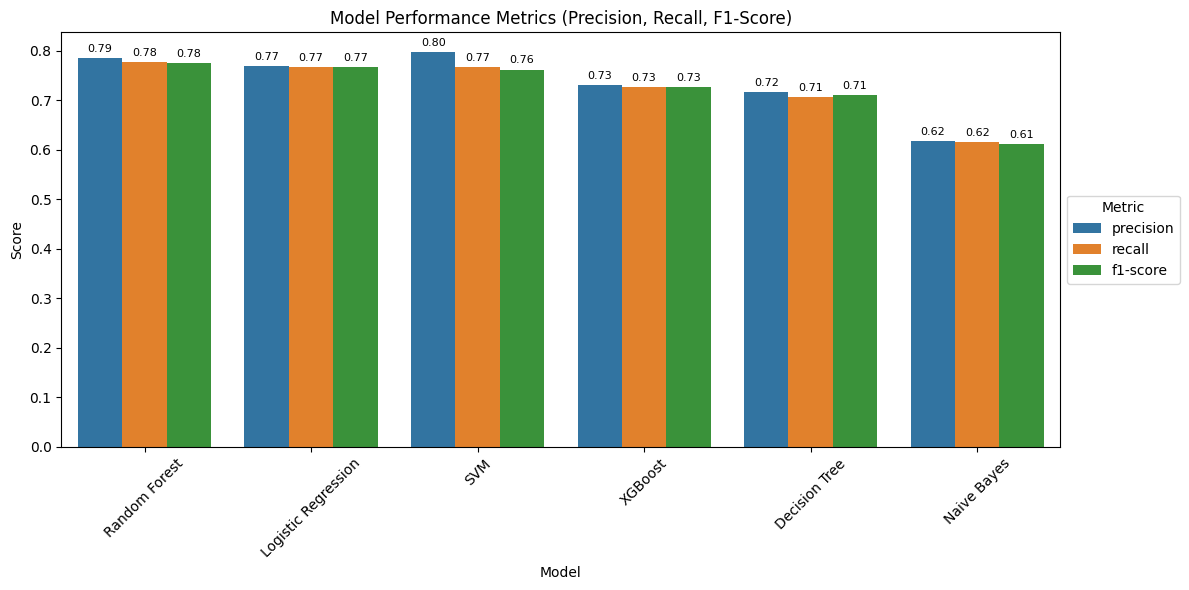

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



results_plot_data = results_df.reset_index().melt(id_vars='index', value_vars=['precision', 'recall', 'f1-score'])


results_plot_data.columns = ['Model', 'Metric', 'Score']

plt.figure(figsize=(12, 6))
sns.barplot(data=results_plot_data, x='Model', y='Score', hue='Metric', ci=None)


plt.title('Model Performance Metrics (Precision, Recall, F1-Score)')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend to the right side


for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


RE RUN THE MODEL

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:00:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


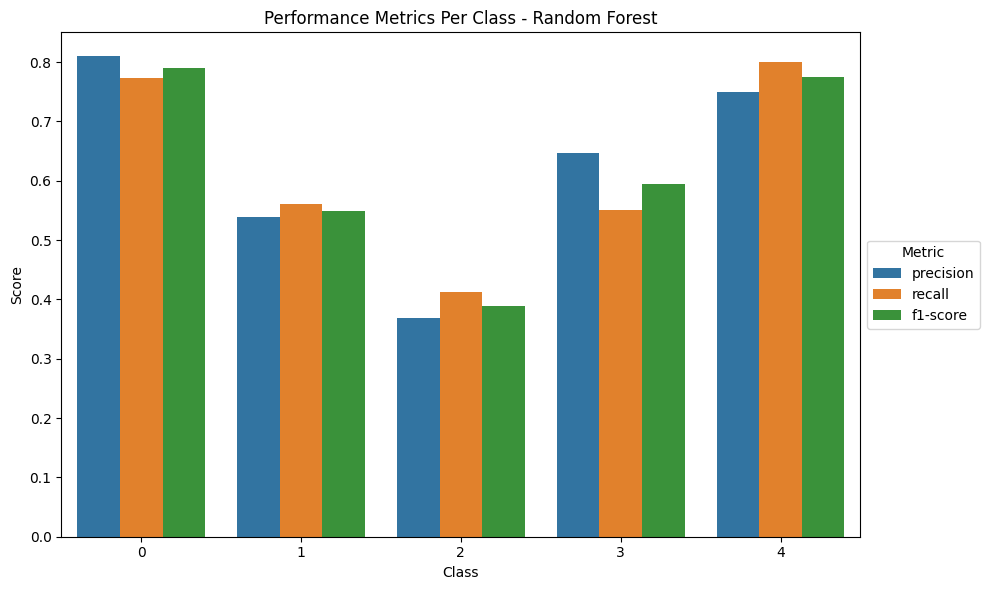

<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


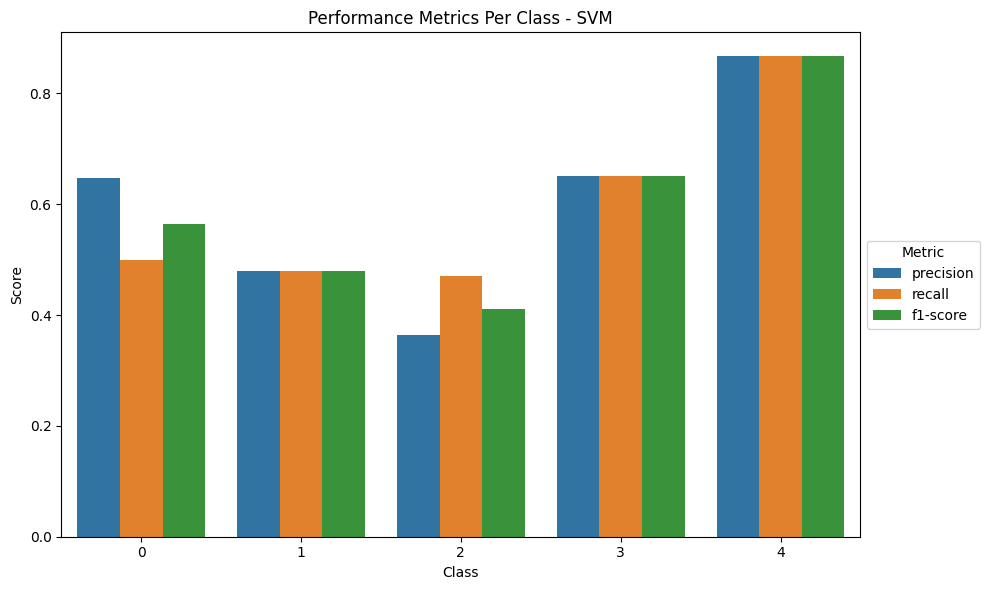

<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


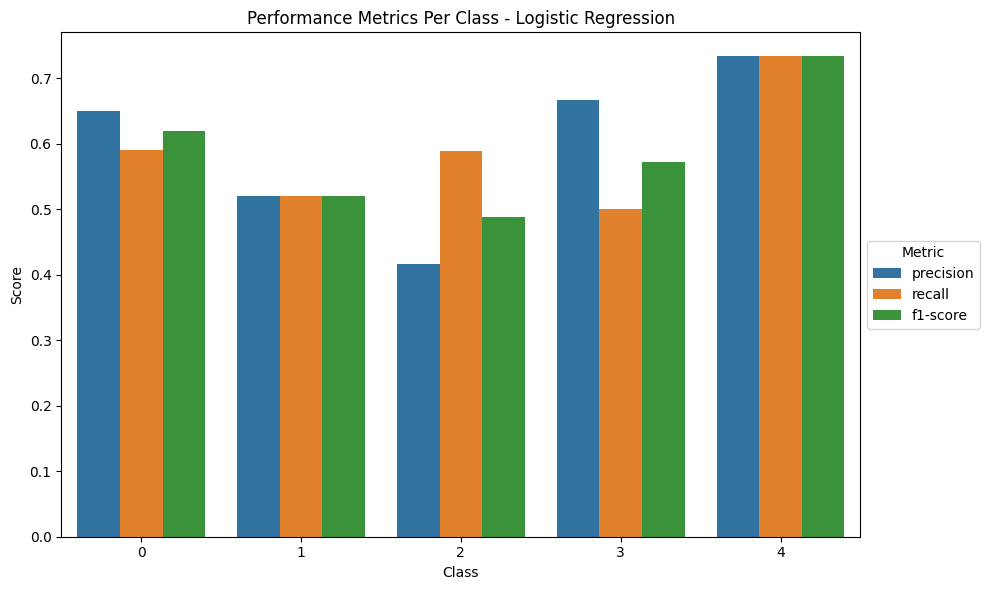

<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


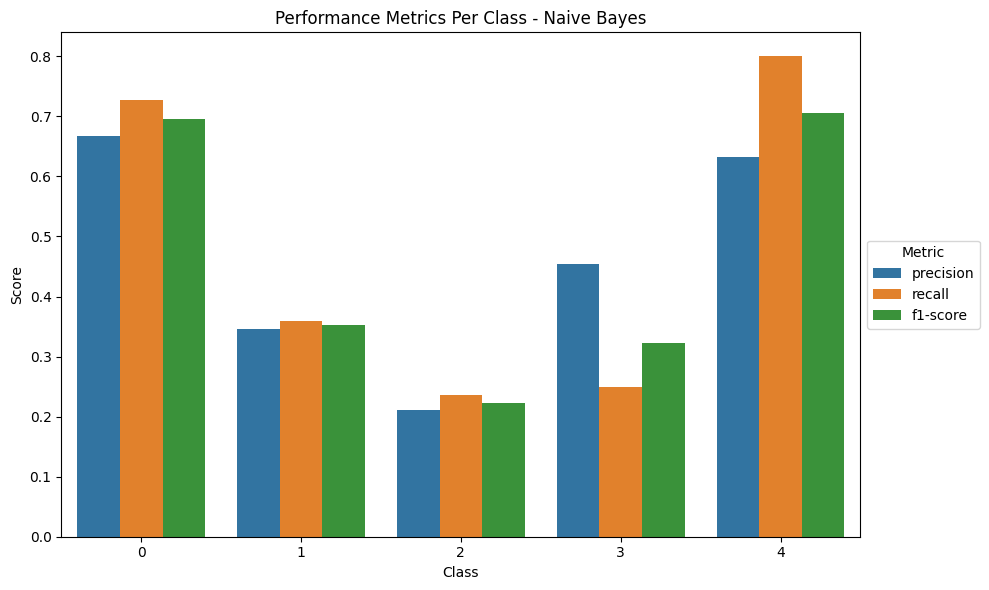

<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


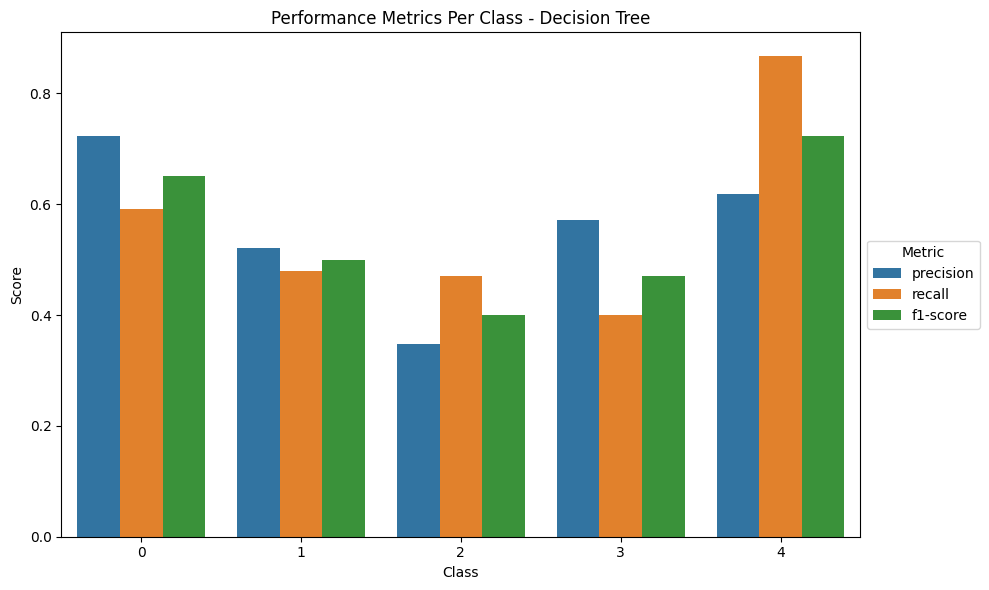

<ipython-input-21-9e8ac8668918>:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),


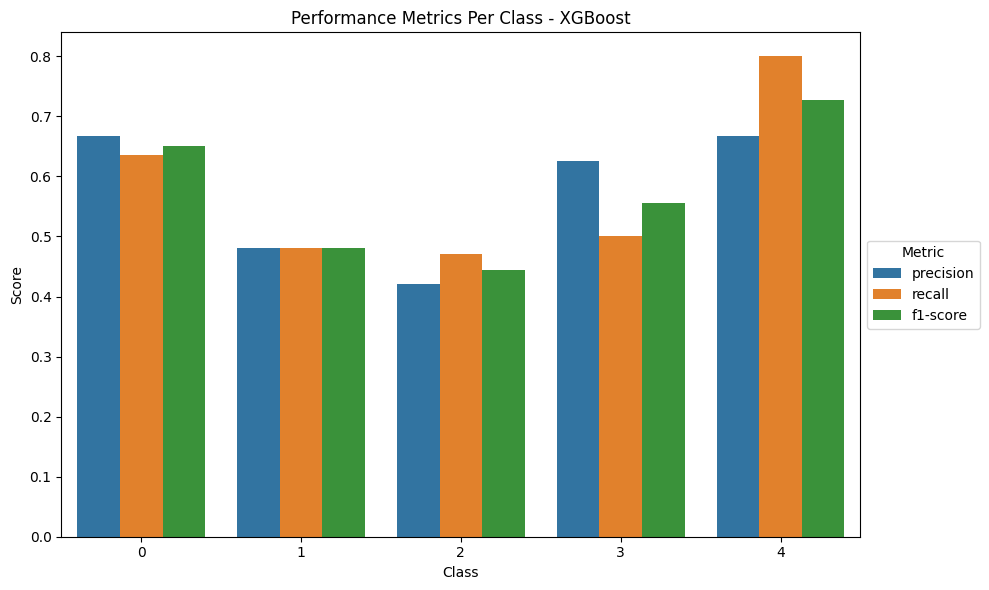

In [ ]:
############## add this#########

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ncr_aqi_data = pd.read_csv('/content/Cleaned_NCR_AQI_Data.csv')
ncr_aqi_data = ncr_aqi_data.drop(columns=['City'])
X = ncr_aqi_data[[col for col in ncr_aqi_data.columns if col not in ['midlong', 'midlat', 'AQI', 'AQI_Bucket', 'AQI_Bucket_Encoded']]]
y = pd.qcut(ncr_aqi_data['AQI'], q=5, labels=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


per_class_results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    per_class_results[name] = pd.DataFrame(report).T


for model_name, metrics_df in per_class_results.items():
    metrics_df = metrics_df[metrics_df.index.str.isdigit()]
    metrics_df = metrics_df[['precision', 'recall', 'f1-score']].reset_index()
    metrics_df = metrics_df.rename(columns={'index': 'Class'})

    plt.figure(figsize=(10, 6))
    sns.barplot(data=metrics_df.melt(id_vars='Class', value_vars=['precision', 'recall', 'f1-score']),
                x='Class', y='value', hue='variable', ci=None)
    plt.title(f'Performance Metrics Per Class - {model_name}')
    plt.ylabel('Score')
    plt.xlabel('Class')
    plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


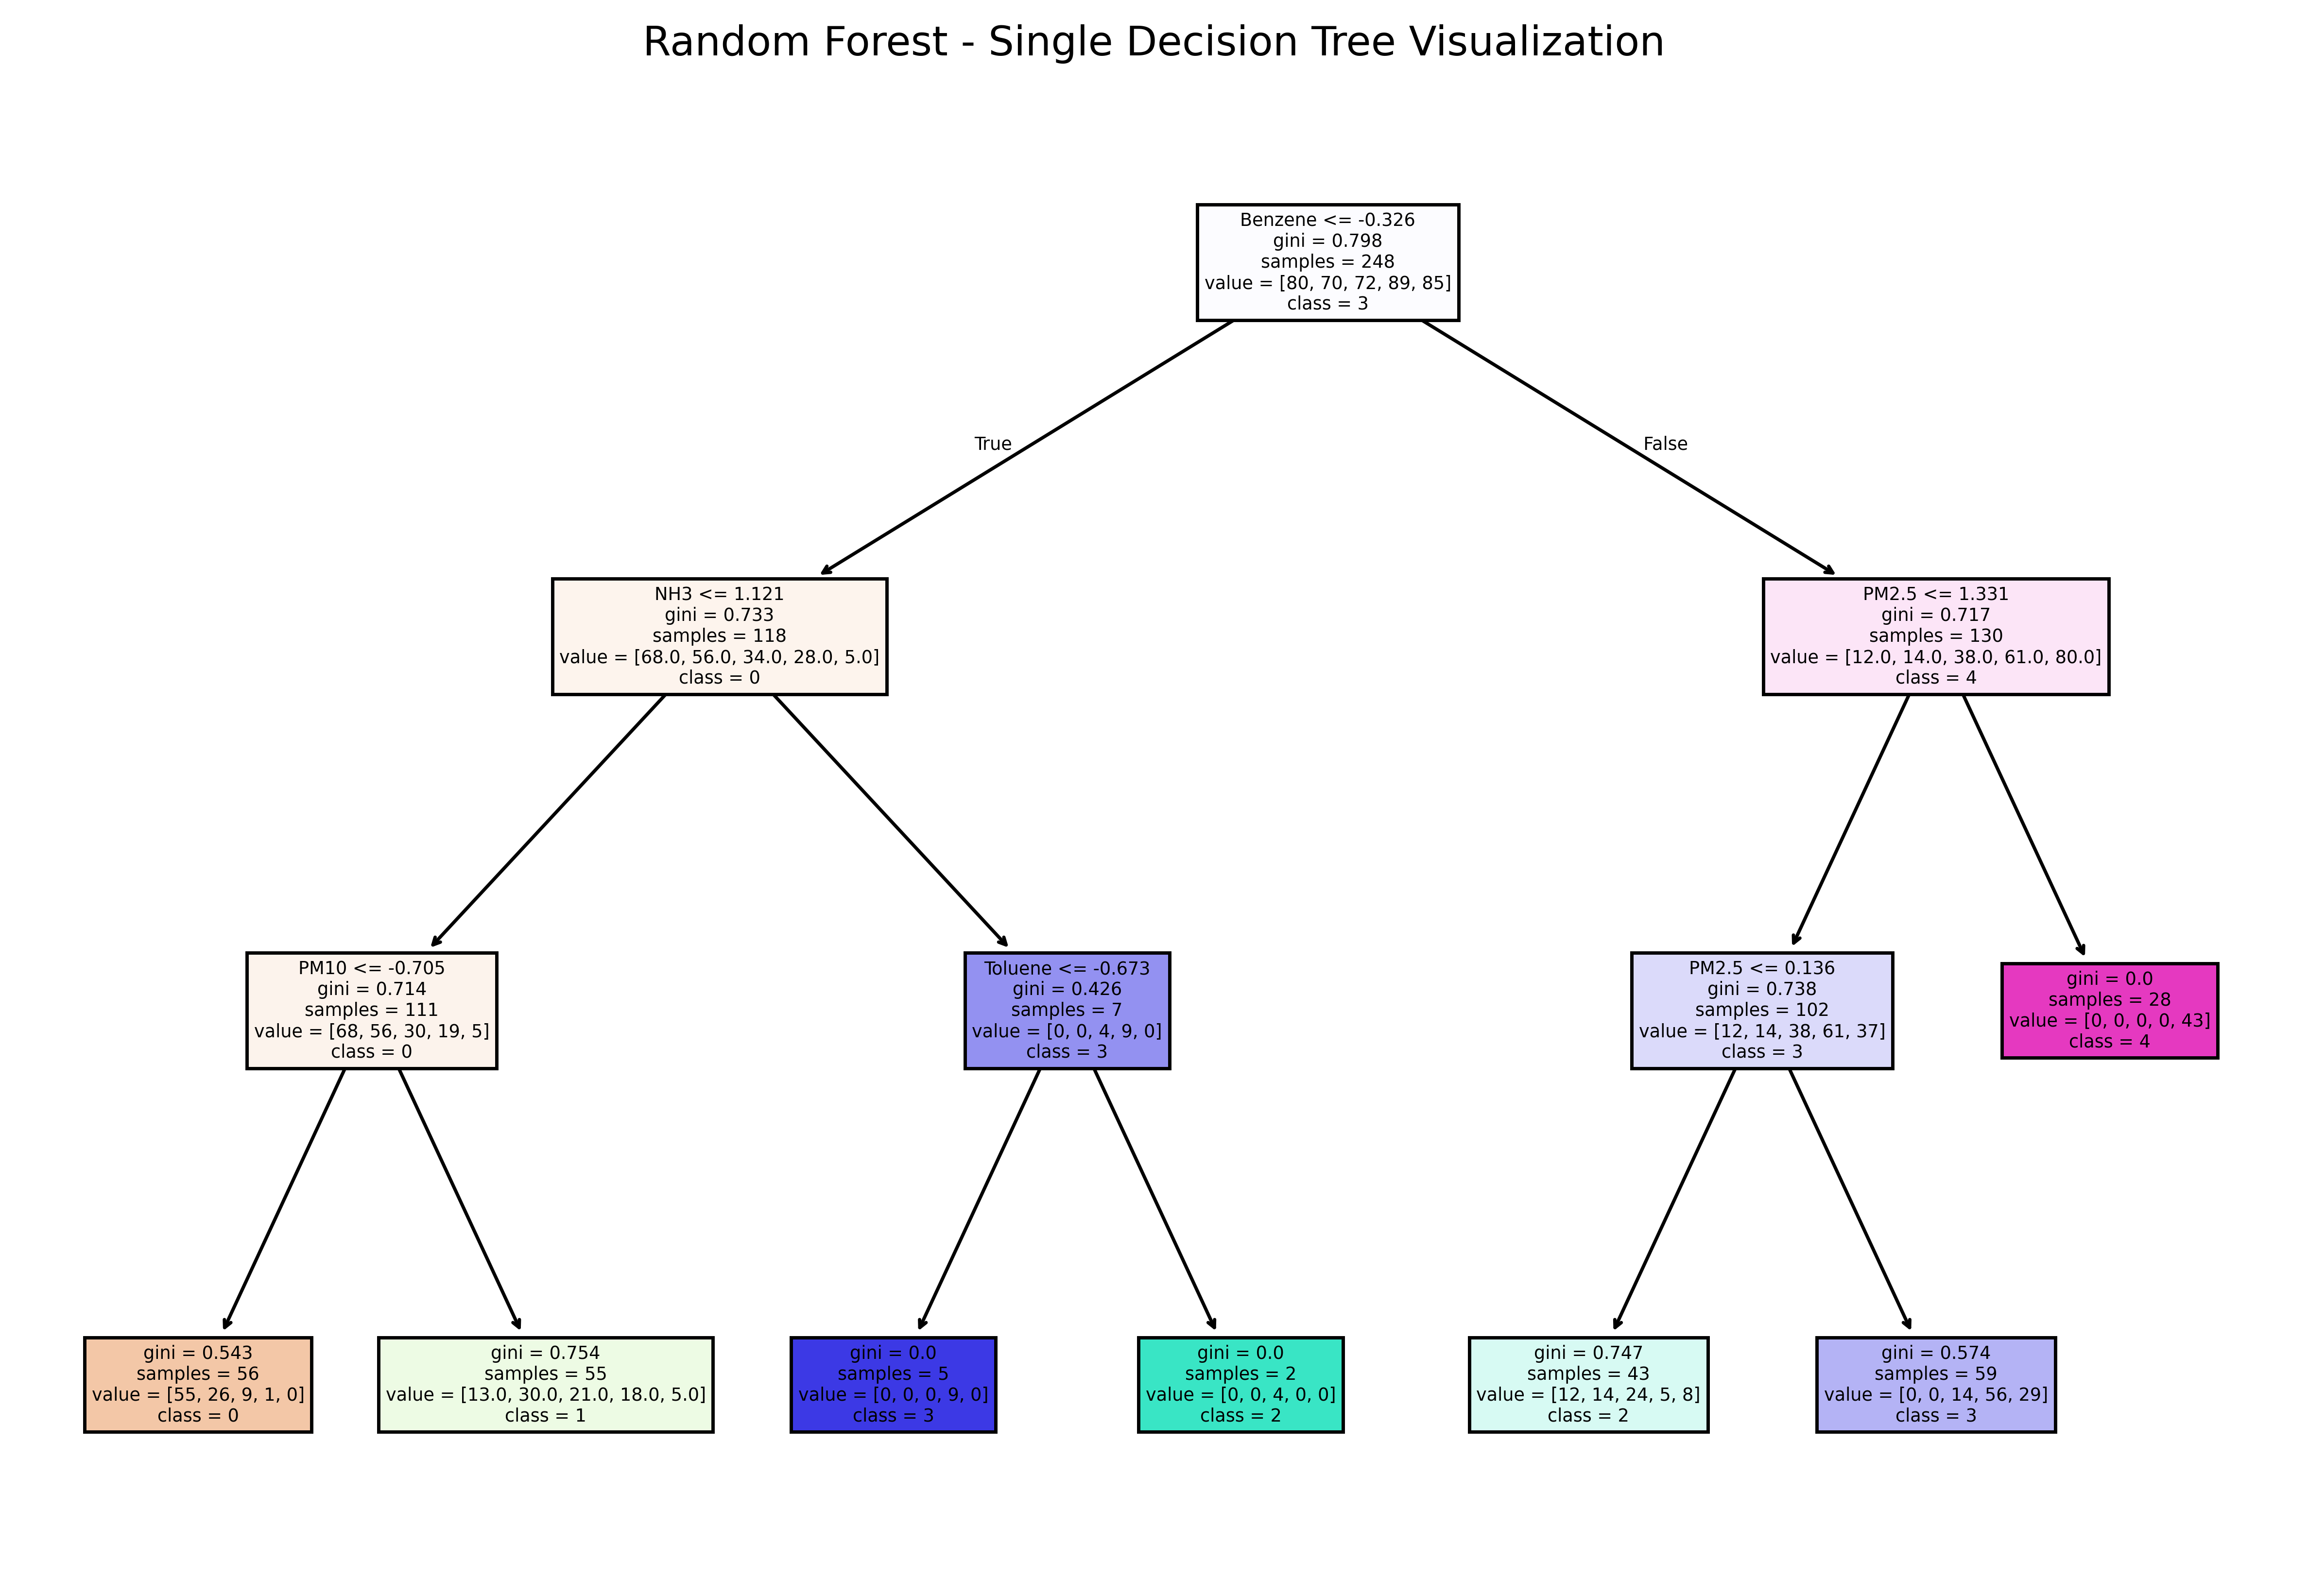

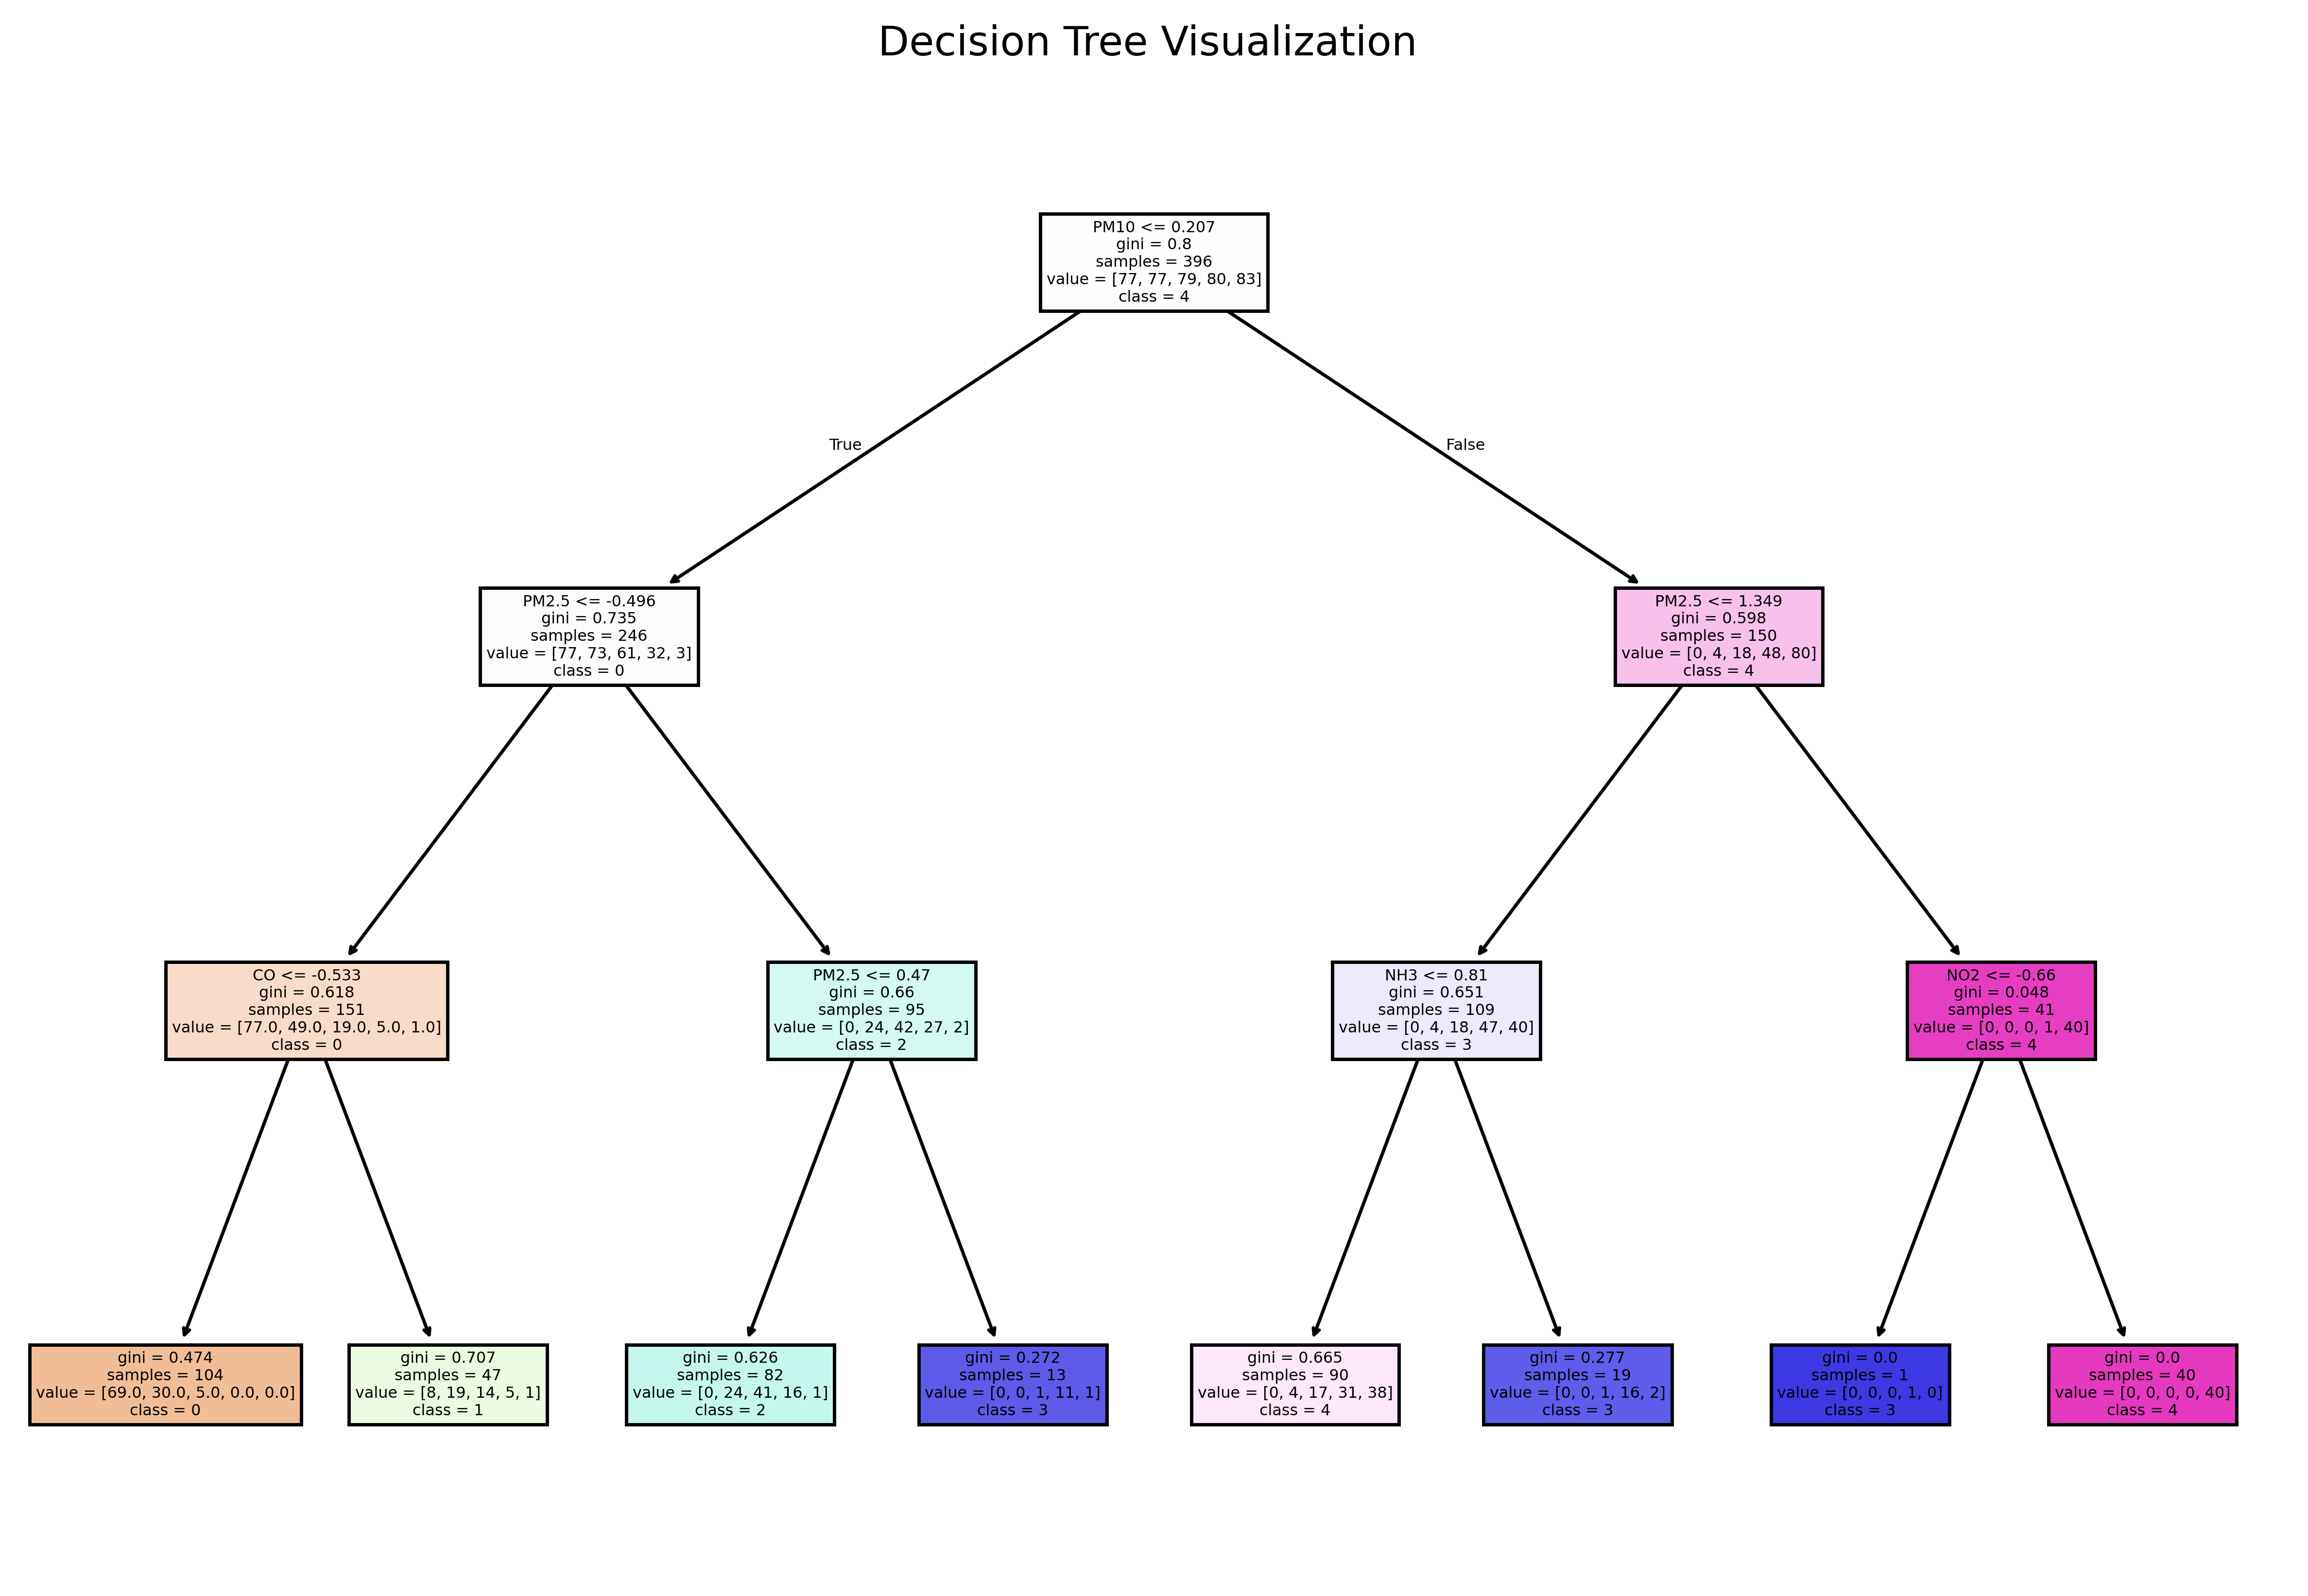

In [ ]:


from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Train a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)


random_forest = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
random_forest.fit(X_train, y_train)

plt.figure(figsize=(12, 8), dpi=500)
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in random_forest.classes_], filled=True)
plt.title("Random Forest - Single Decision Tree Visualization")
plt.show()


plt.figure(figsize=(12, 8), dpi=500)
plot_tree(decision_tree, feature_names=X.columns, class_names=[str(c) for c in decision_tree.classes_], filled=True)
plt.title("Decision Tree Visualization ")
plt.show()




# DISPLAY RANDOM FOREST TREE

<Figure size 4800x3600 with 0 Axes>

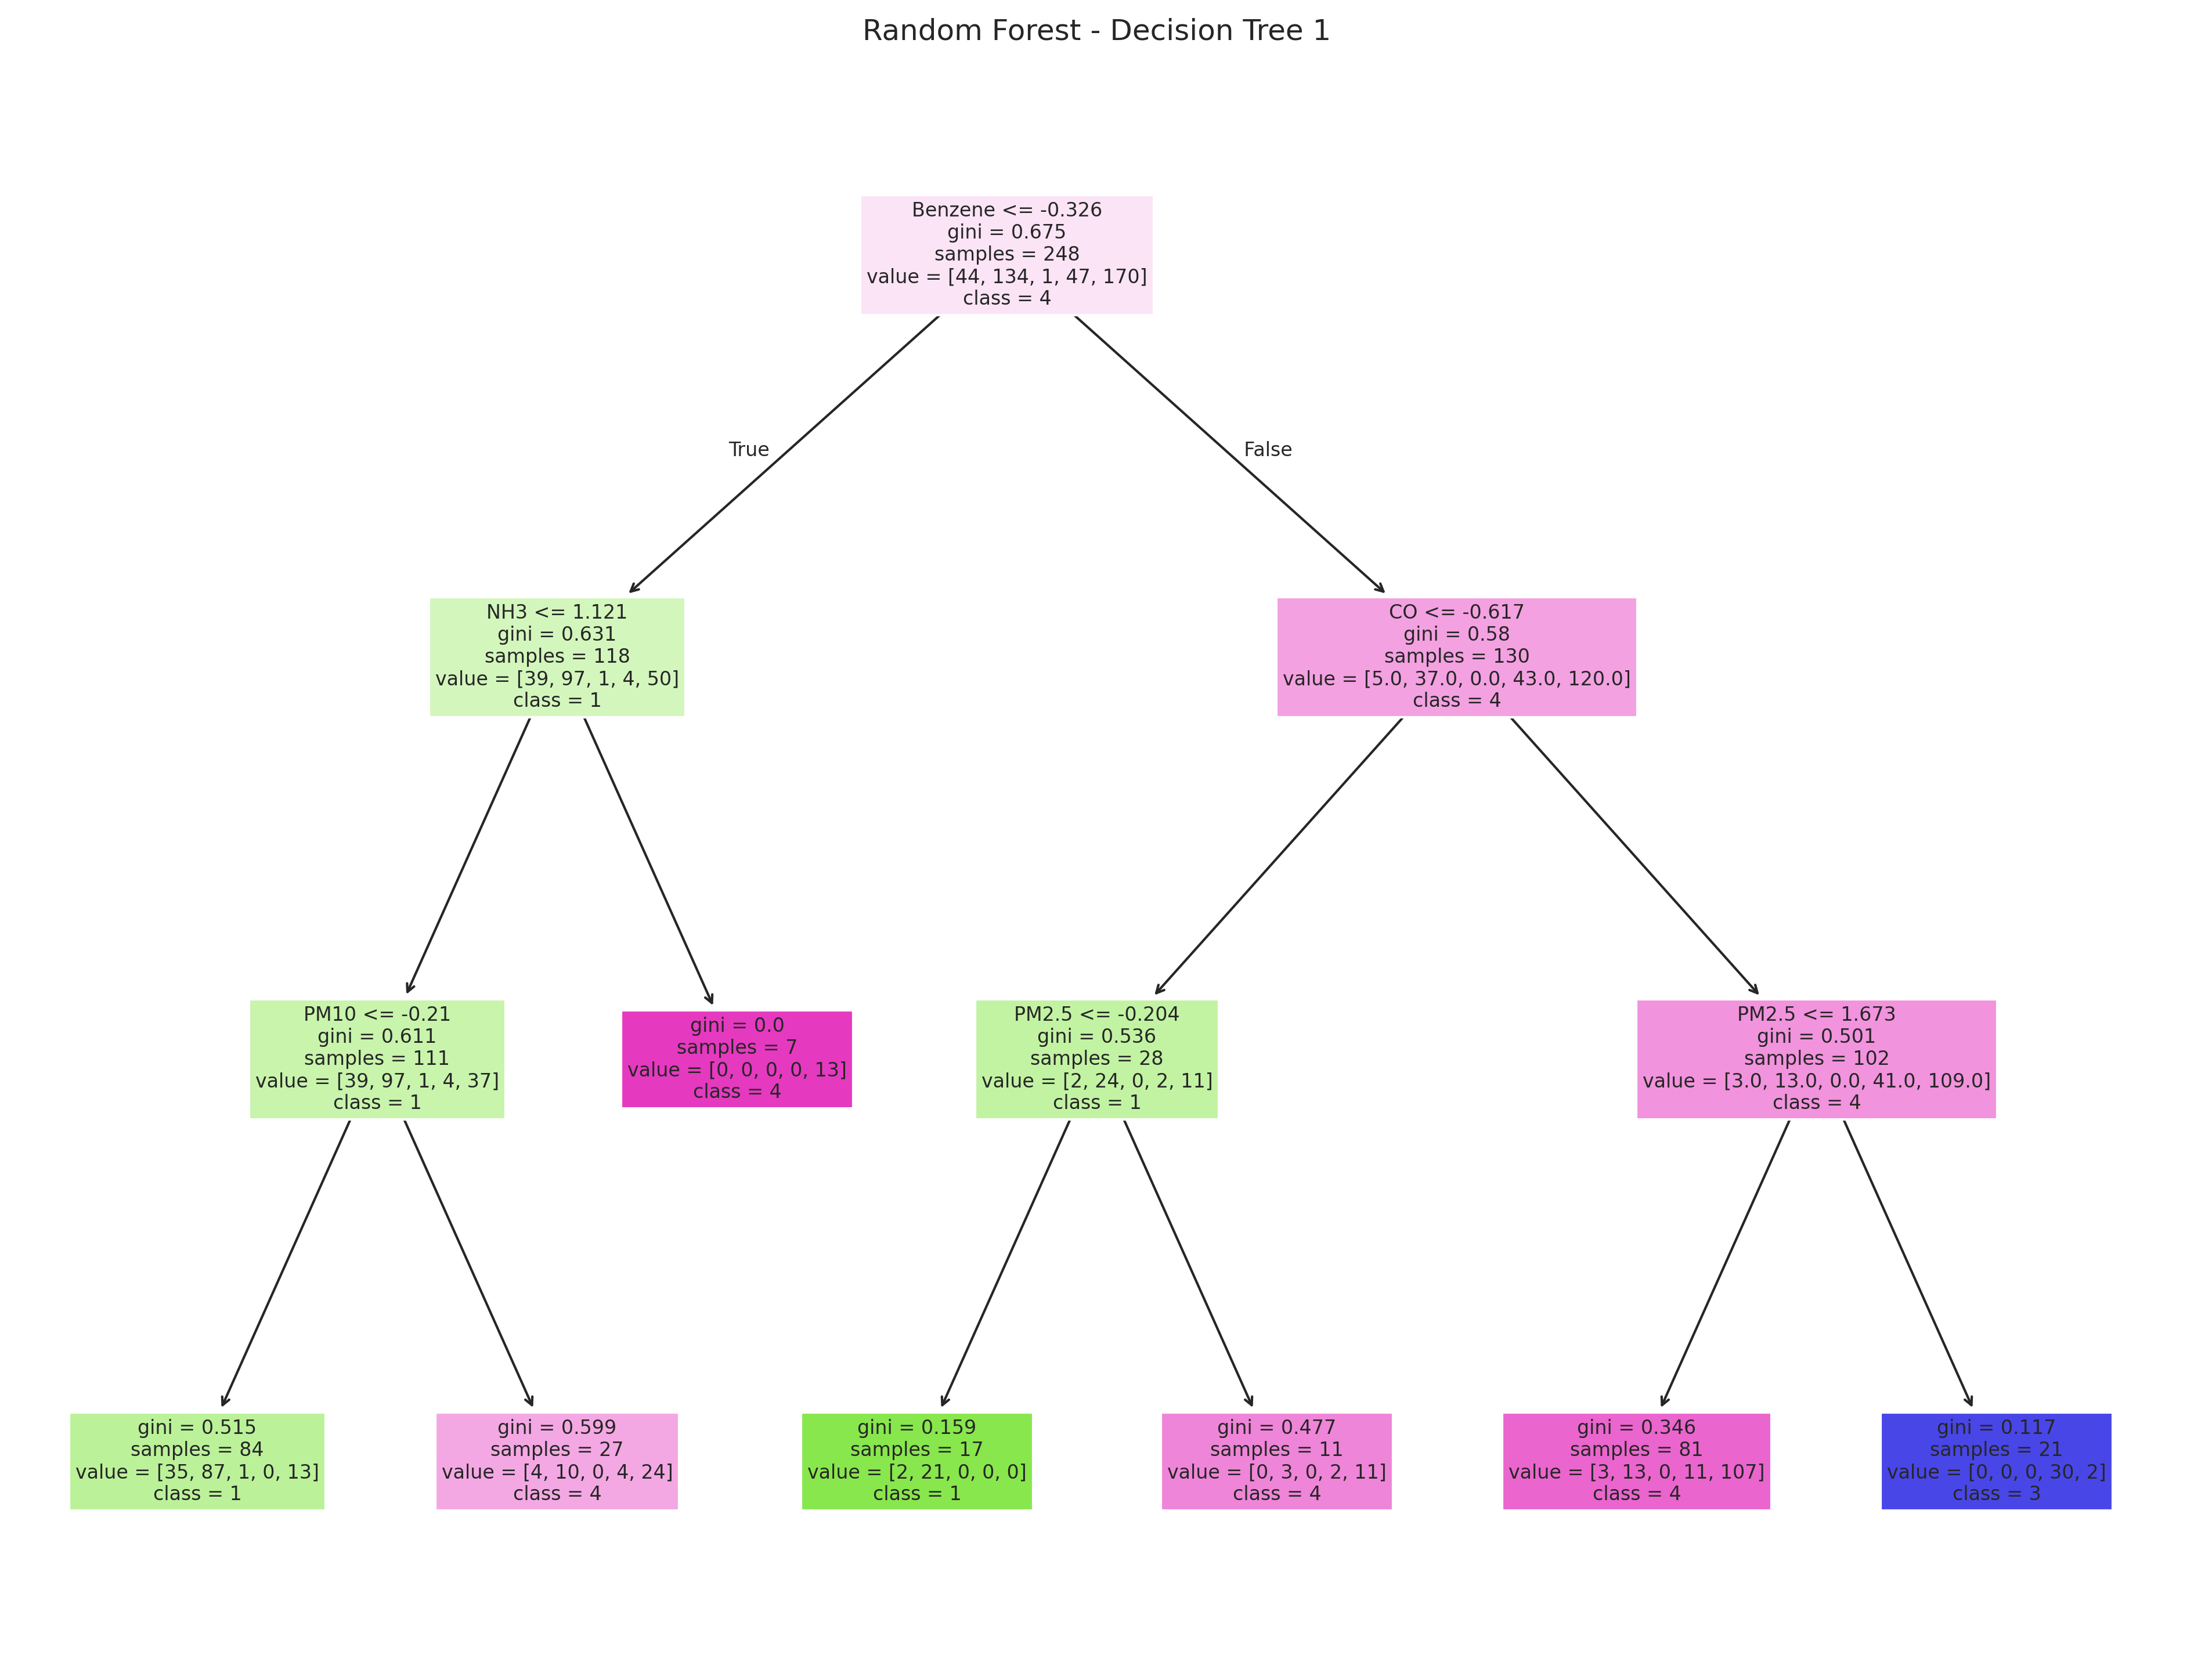

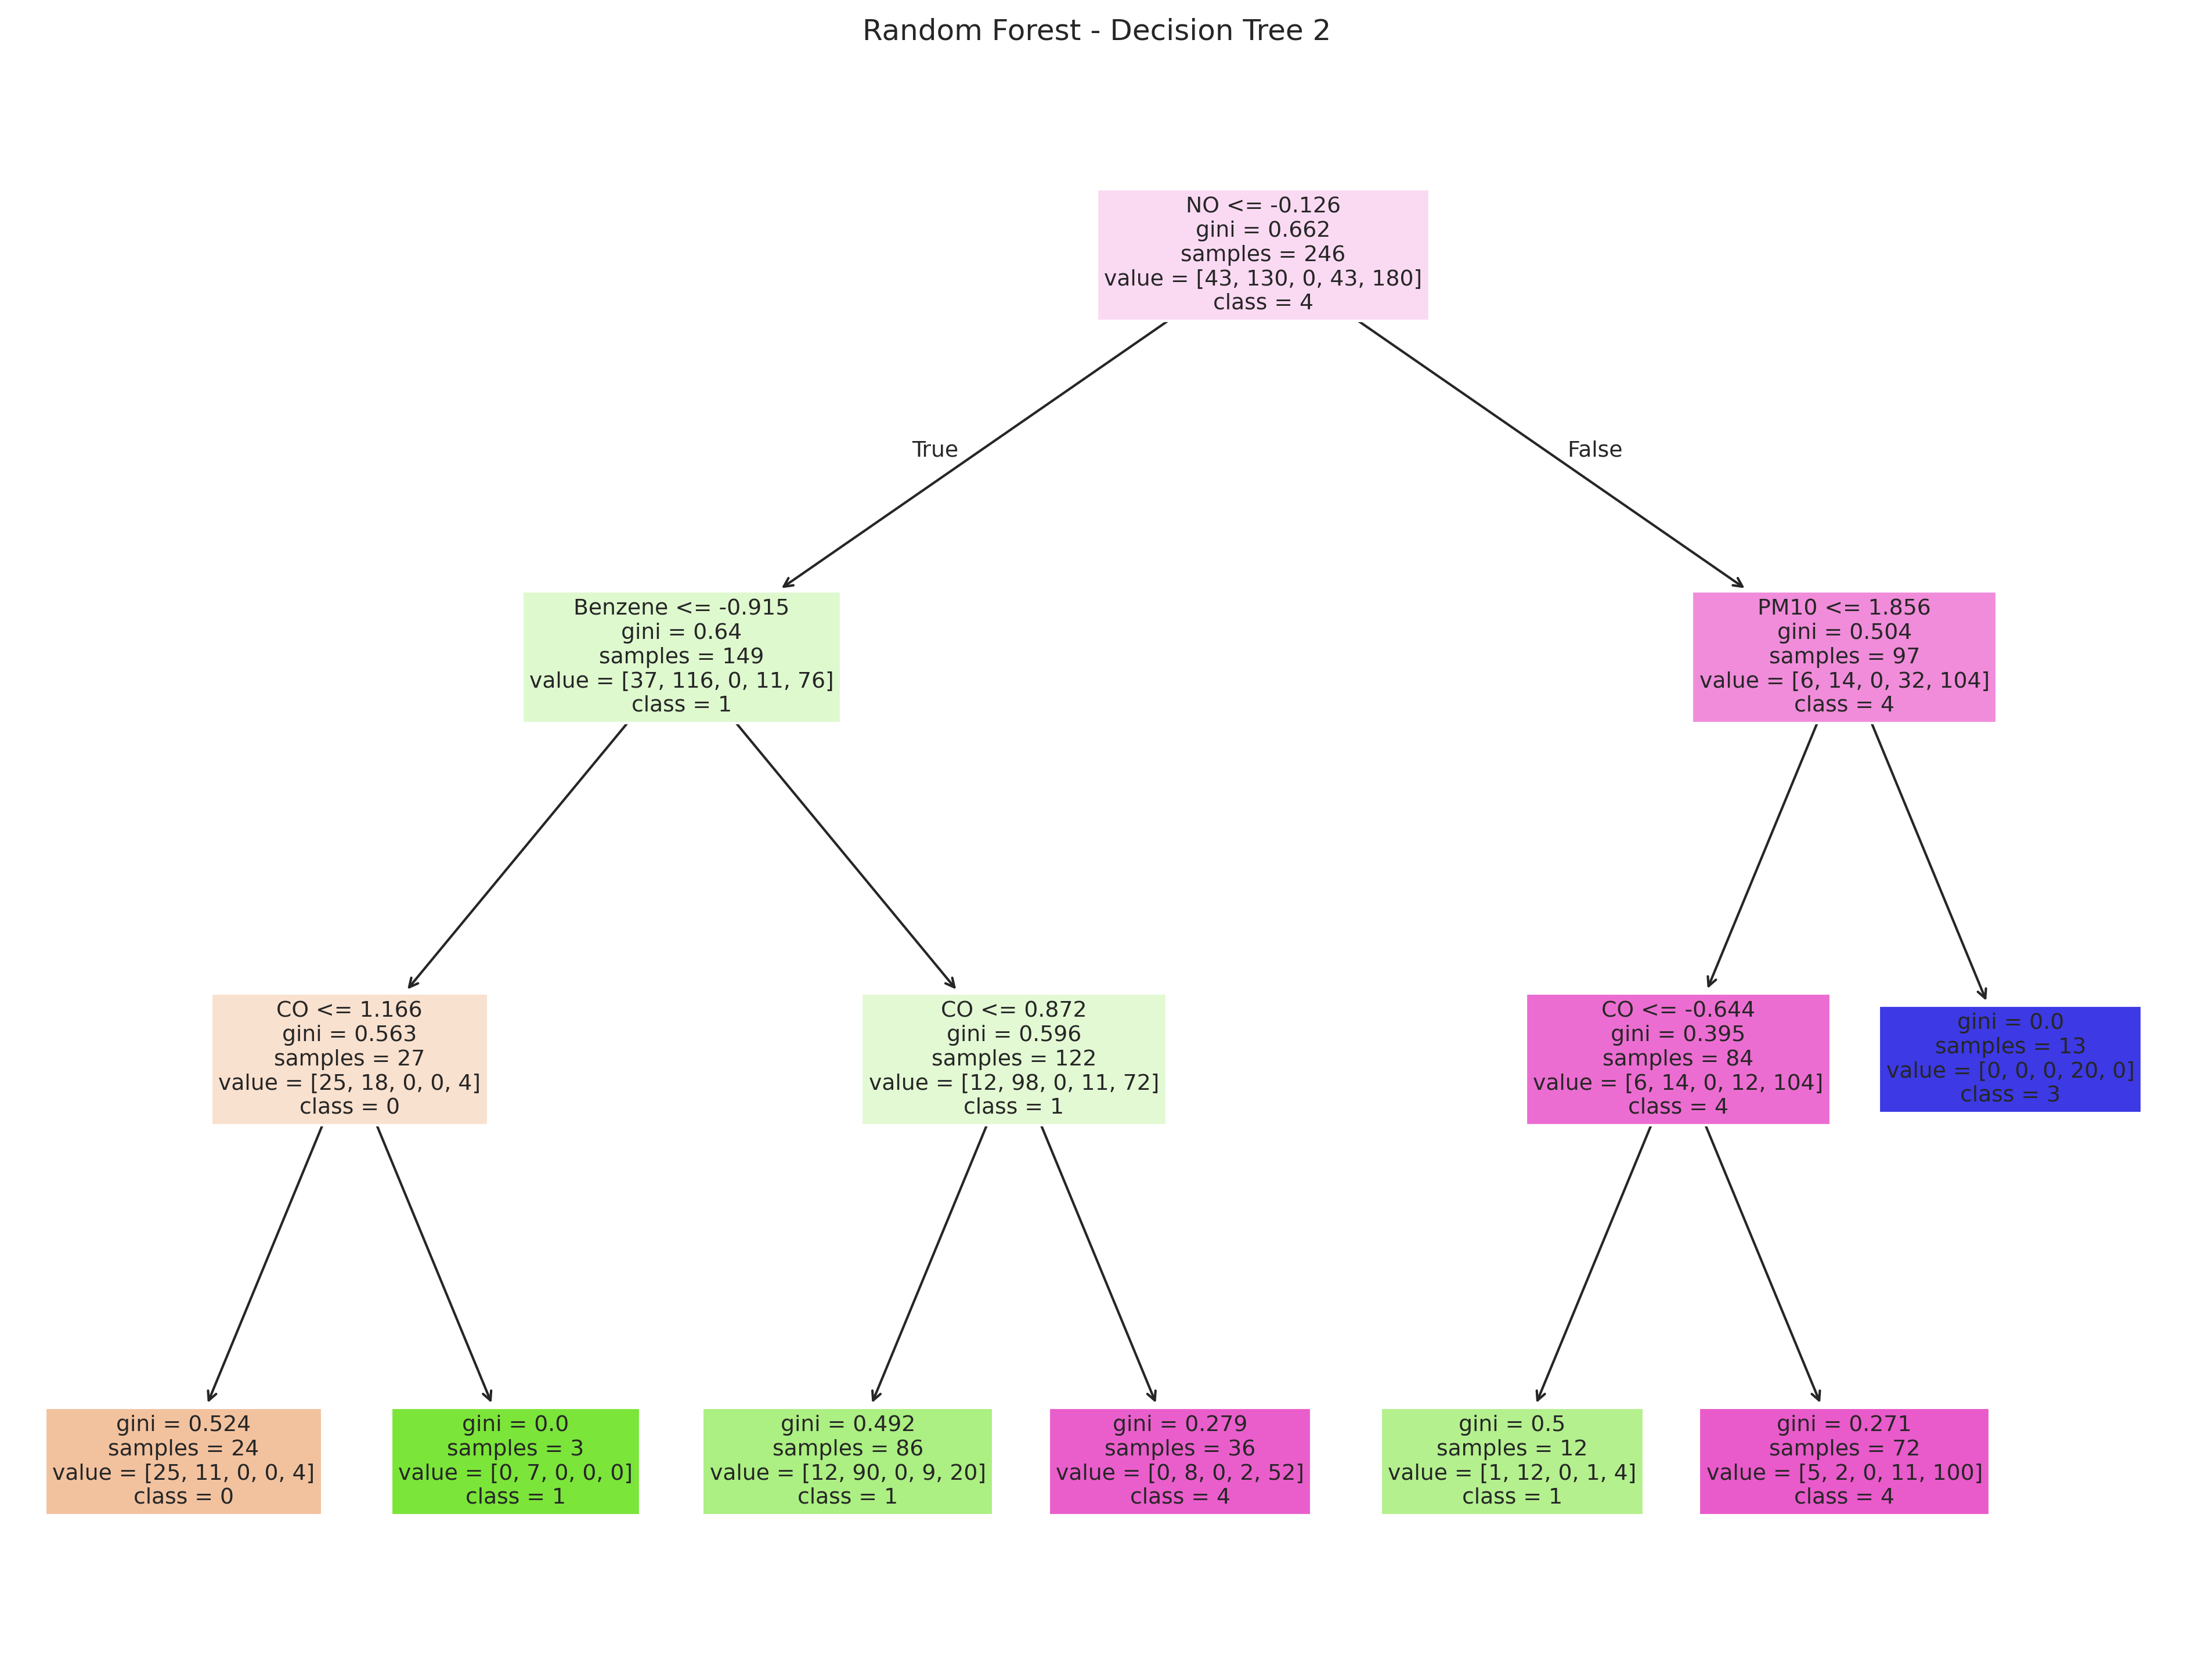

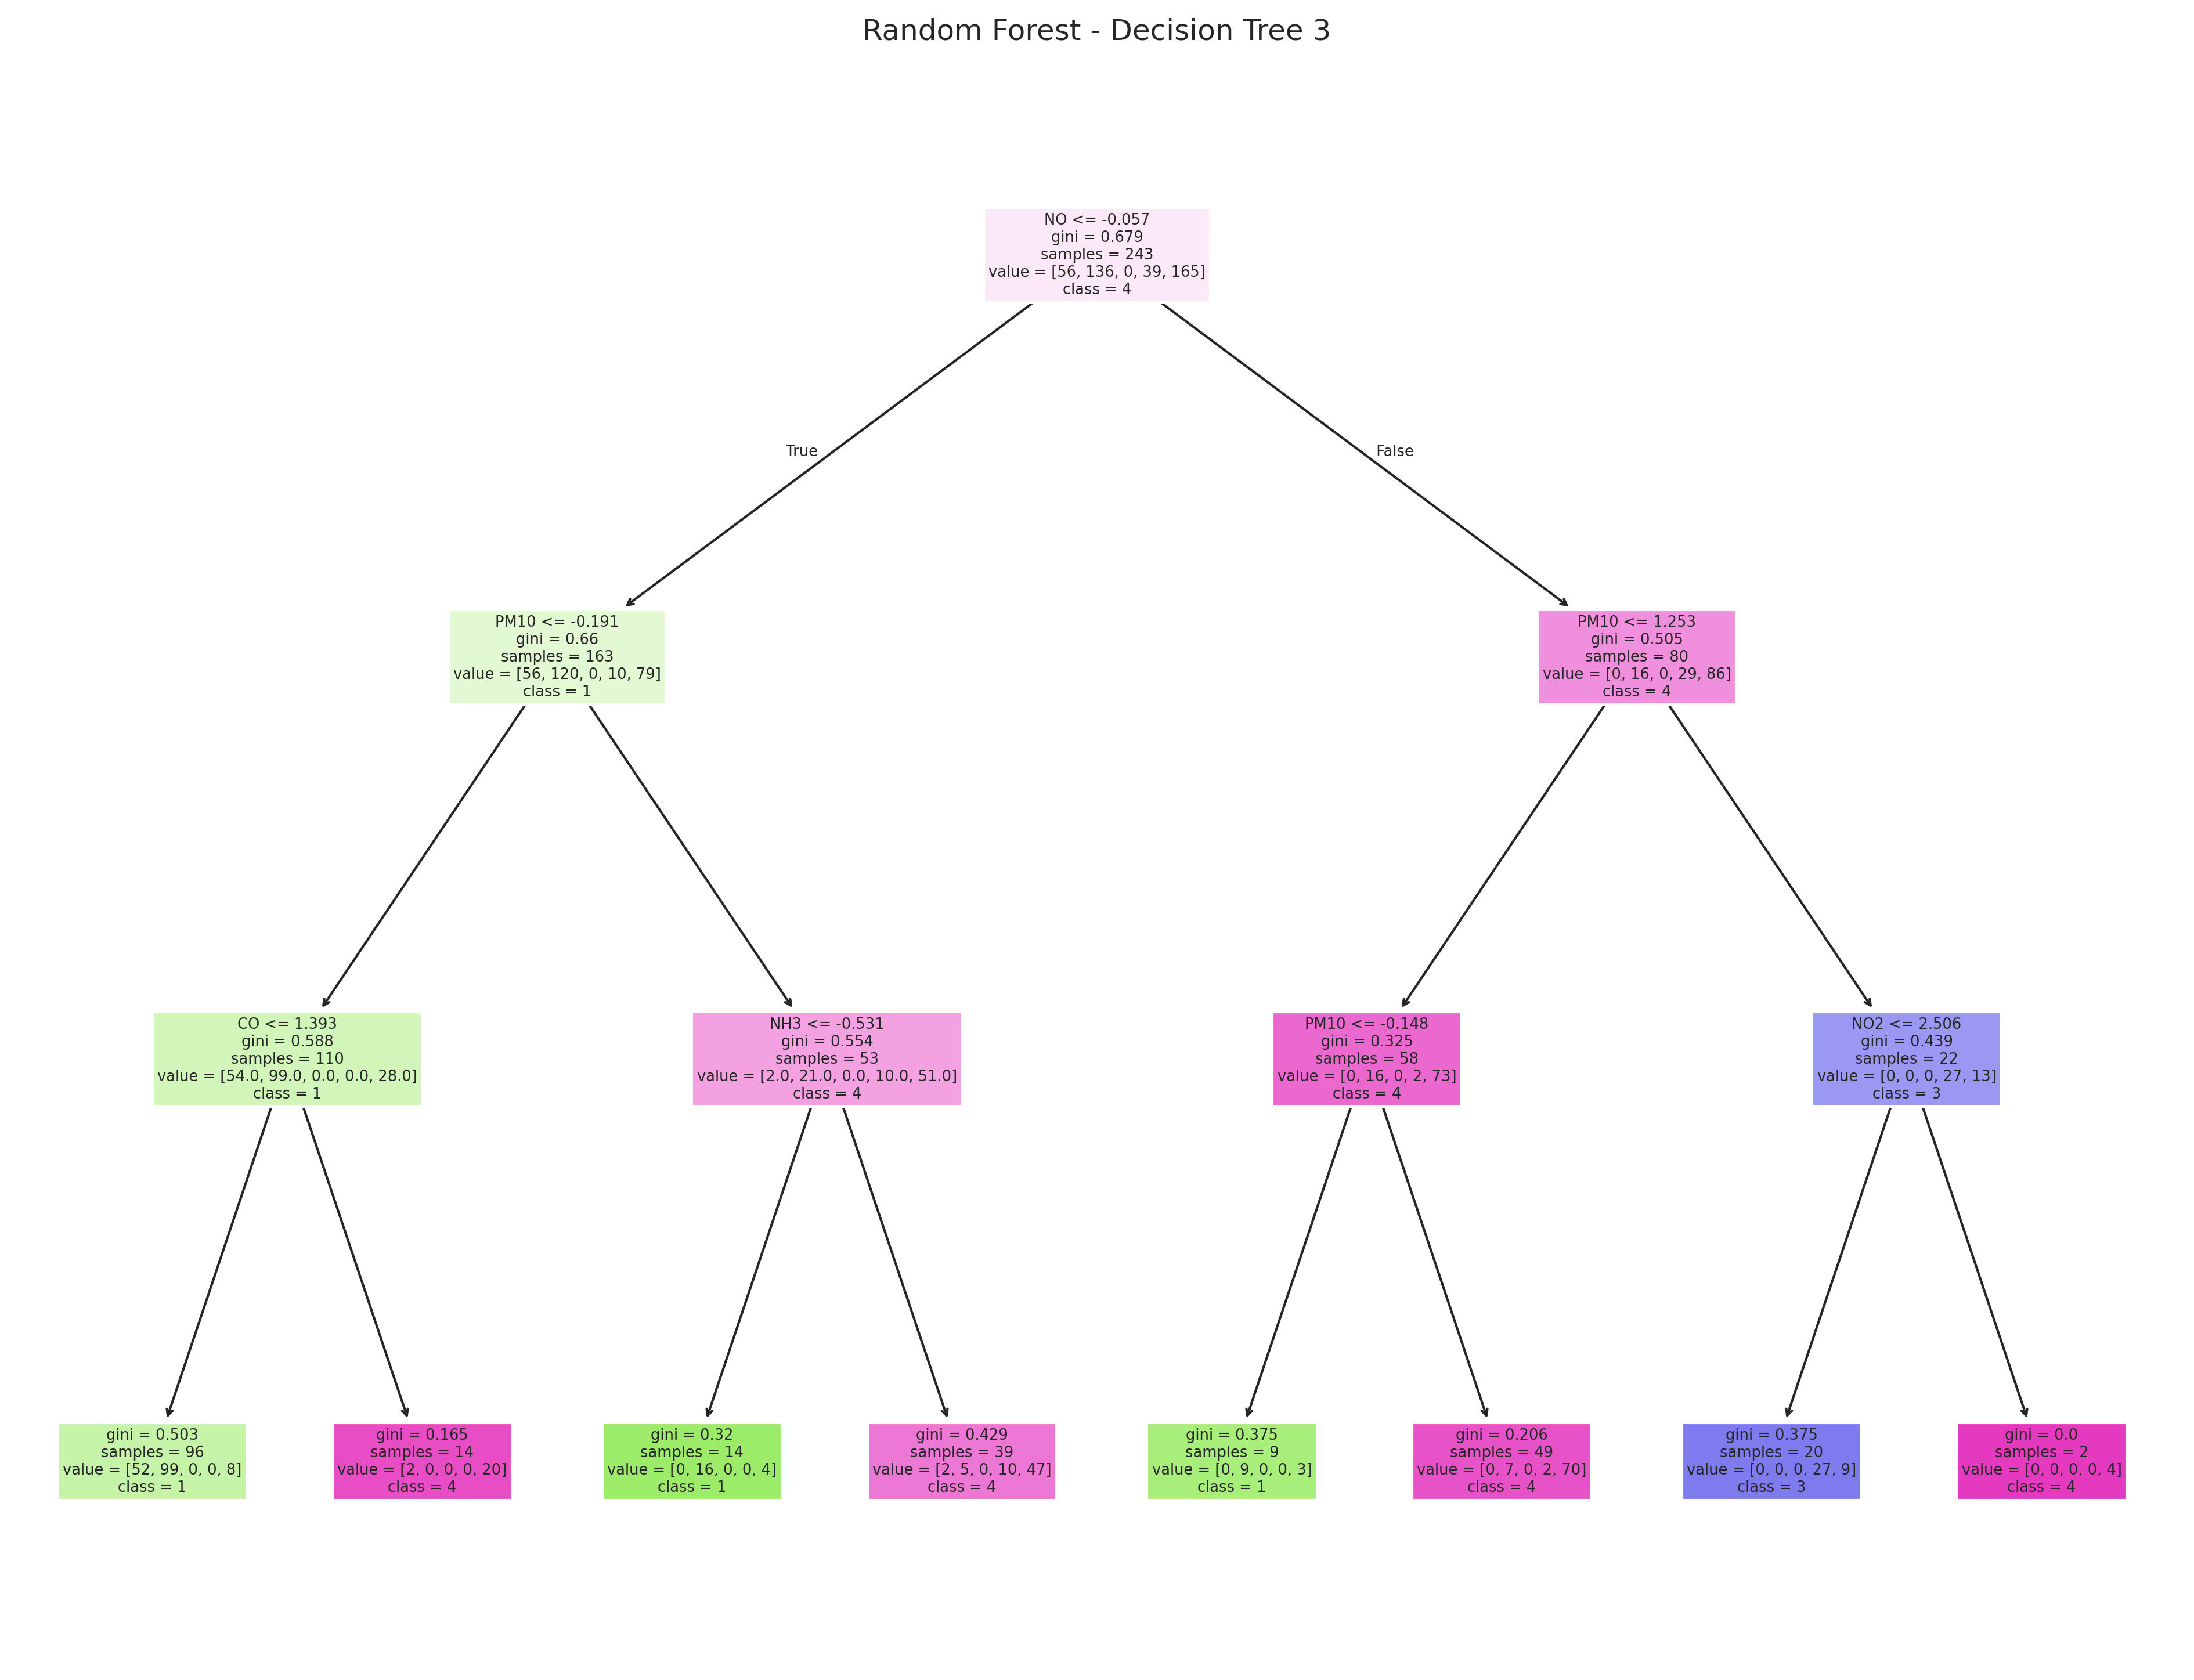

In [ ]:
############## add this#########
num_trees_to_plot = 3
plt.figure(figsize=(16, 12), dpi=300)

for i in range(num_trees_to_plot):
    plt.figure(figsize=(16, 12), dpi=300)
    plot_tree(random_forest.estimators_[i], feature_names=X.columns, class_names=[str(c) for c in random_forest.classes_], filled=True)
    plt.title(f"Random Forest - Decision Tree {i+1}")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

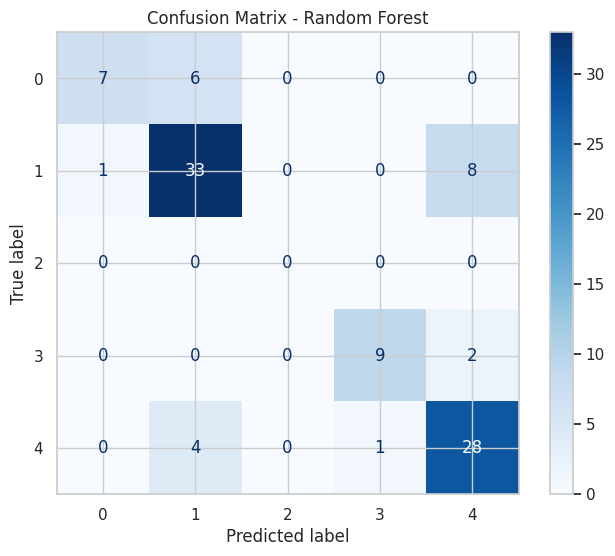

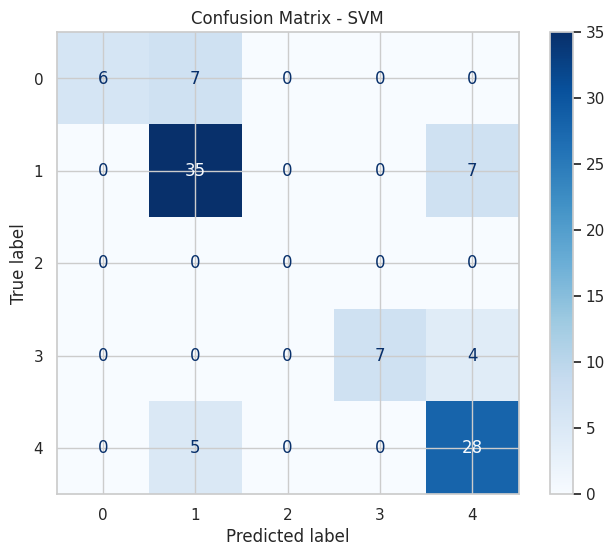

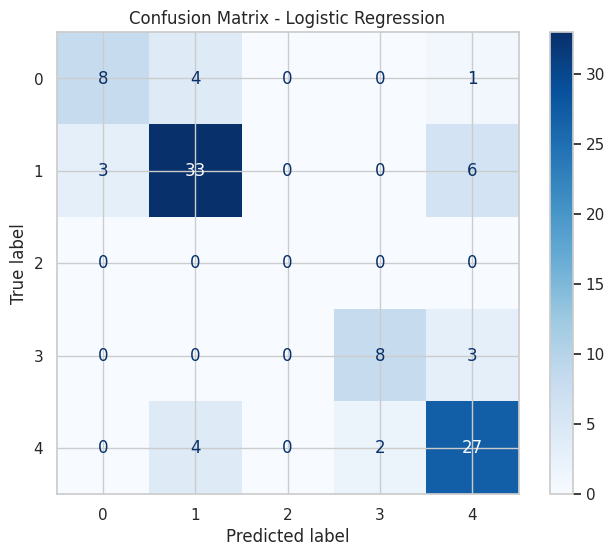

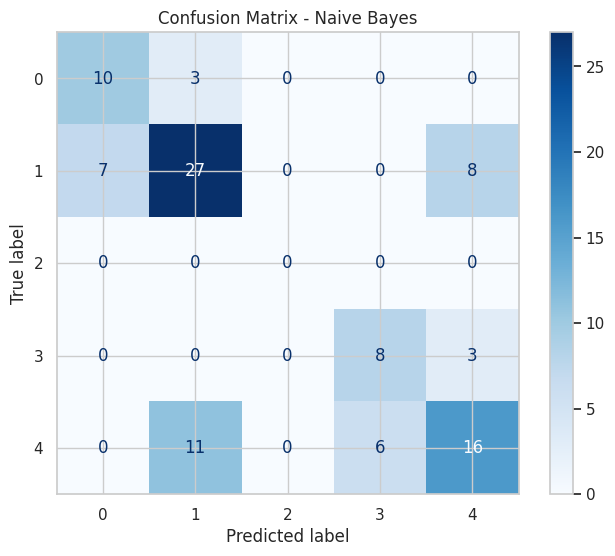

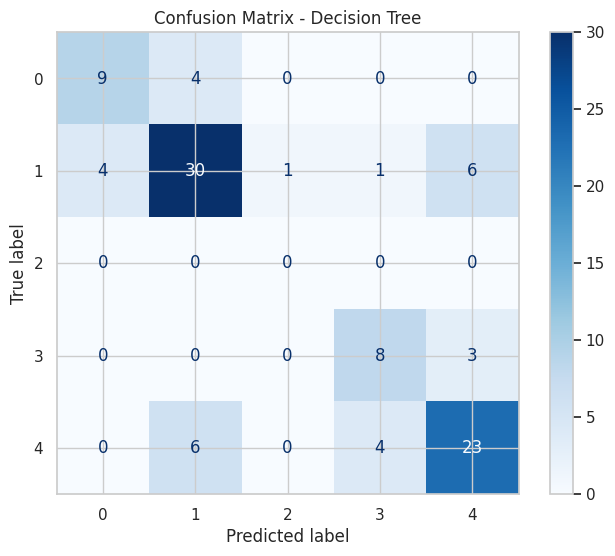

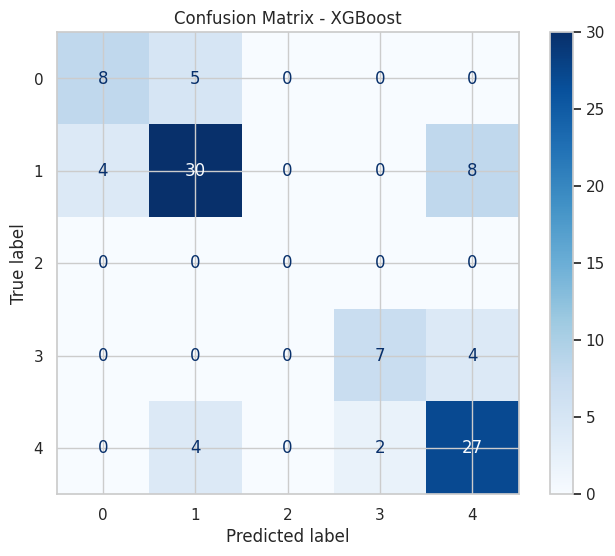

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x600 with 0 Axes>

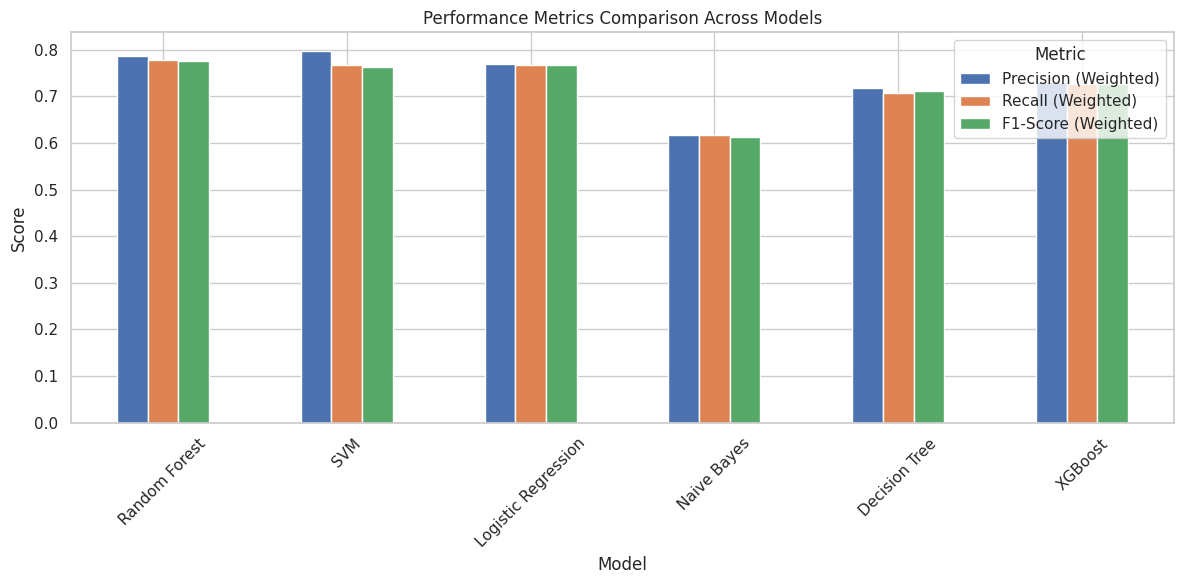

In [ ]:
############## add this#########

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


model_reports = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_reports[name] = classification_report(y_test, y_pred)


for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


metrics_summary = {
    "Model": [],
    "Precision (Weighted)": [],
    "Recall (Weighted)": [],
    "F1-Score (Weighted)": []
}

for name, report in model_reports.items():
    report_dict = classification_report(y_test, models[name].predict(X_test), output_dict=True)
    metrics_summary["Model"].append(name)
    metrics_summary["Precision (Weighted)"].append(report_dict["weighted avg"]["precision"])
    metrics_summary["Recall (Weighted)"].append(report_dict["weighted avg"]["recall"])
    metrics_summary["F1-Score (Weighted)"].append(report_dict["weighted avg"]["f1-score"])


import pandas as pd

metrics_df = pd.DataFrame(metrics_summary)


plt.figure(figsize=(12, 6))
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Performance Metrics Comparison Across Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric", loc="upper right")
plt.tight_layout()
plt.show()


XGBOOST TREE VISUALIZATION FIRST 4 TREE

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 60000x40000 with 0 Axes>

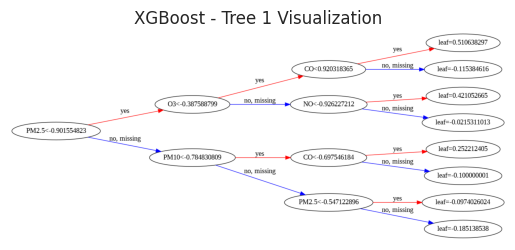

<Figure size 60000x40000 with 0 Axes>

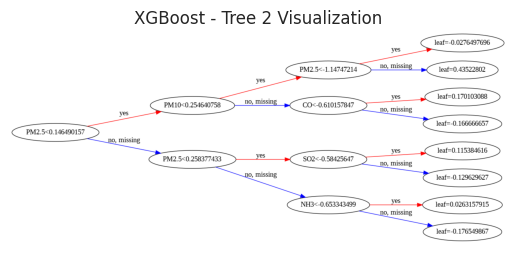

<Figure size 60000x40000 with 0 Axes>

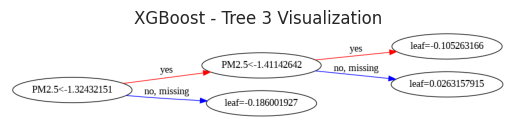

<Figure size 60000x40000 with 0 Axes>

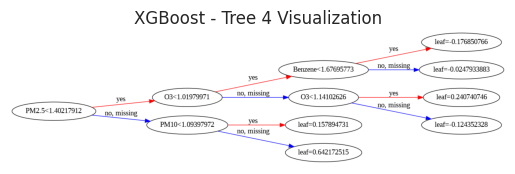

In [ ]:
############## add this#########

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import plot_tree
import matplotlib.pyplot as plt


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

num_trees_to_plot = 4
for i in range(num_trees_to_plot):
    plt.figure(figsize=(12, 8), dpi=5000
               )
    plot_tree(xgb_model, num_trees=i, rankdir="LR")
    plt.title(f"XGBoost - Tree {i+1} Visualization")
    plt.show()

new data whole csv

In [ ]:
############## add this#########

model_aqi_results = pd.DataFrame({'latitude': ncr_aqi_data.loc[X_test.index, 'midlat'],
                                  'longitude': ncr_aqi_data.loc[X_test.index, 'midlong']})

for name, model in models.items():

    y_pred_model = model.predict(X_test)
    model_aqi_results[name + '_AQI'] = y_pred_model


file_path_aqi = 'all_models_aqi_predictions.csv'
model_aqi_results.to_csv(file_path_aqi, index=False)

file_path_aqi


'all_models_aqi_predictions.csv'

In [ ]:
############## add this#########

test_indices = X_test.index
results_df = pd.DataFrame({'latitude':ncr_aqi_data.loc[test_indices,'midlat'],
                            'longitude': ncr_aqi_data.loc[test_indices, 'midlong'],
                            'AQI': y_pred})
#df save
results_df.to_csv('predicted_results1.csv', index=False)

In [ ]:
############## add this#########

import joblib


for name, model in models.items():
    joblib.dump(model, f'{name}_model.pkl')

joblib.dump(num_imputer, 'num_imputer.pkl')
joblib.dump(cat_imputer, 'cat_imputer.pkl')
joblib.dump(discretizer, 'discretizer.pkl')

print("Models and preprocessors saved successfully!")

Models and preprocessors saved successfully!


METRICES  RESULT

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

                        Kappa       MAE       MSE      RMSE  R-squared
Random Forest        0.516825  0.424242  0.525253  0.724743   0.725381
SVM                  0.467128  0.505051  0.727273  0.852803   0.619759
Logistic Regression  0.467128  0.515152  0.757576  0.870388   0.603916
Naive Bayes          0.326876  0.686869  1.010101  1.005038   0.471887
Decision Tree        0.432050  0.525253  0.686869  0.828775   0.640883
XGBoost              0.454301  0.505051  0.707071  0.840875   0.630321


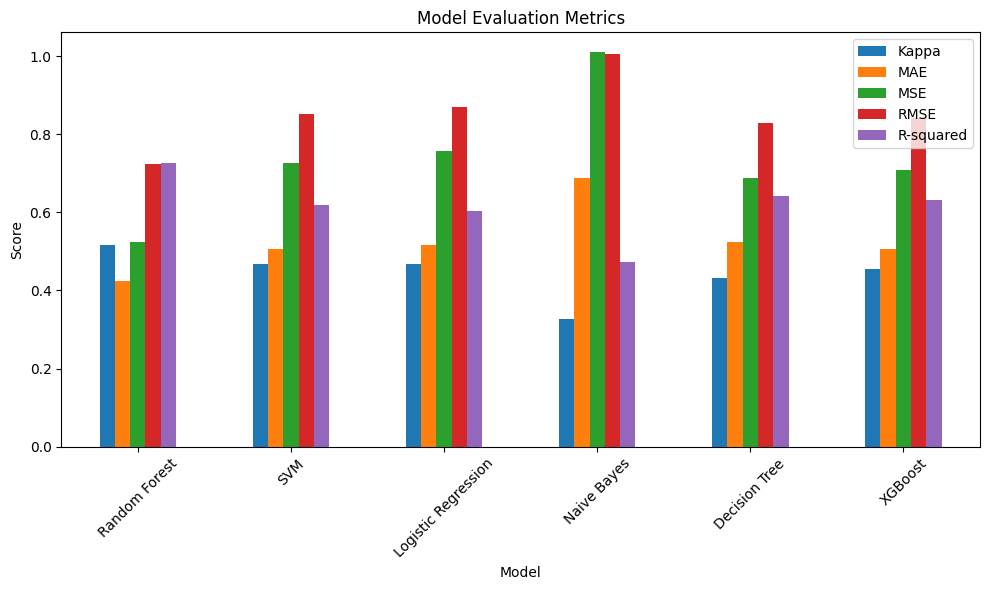

In [ ]:
####################ADDD THIS ALSO ##########

from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


model_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)


    kappa = cohen_kappa_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)


    model_metrics[name] = {
        'Kappa': kappa,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }


metrics_df = pd.DataFrame(model_metrics).T


print(metrics_df)


metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()